# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 3. Генерация признаков

### Общая информация

Дата выдачи: 19.10.2025

Мягкий дедлайн: 04.11.2025 23:59MSK

Жесткий дедлайн: 08.11.2025 23:59MSK

### О задании

В данном задании необходимо реализовать самые ходовые техники для создания новых признаков в табличном машинном обучении. Вам понадобиться применить всю вашу фантазию, чтобы собрать наилучшие признаки для решения задачи линейной классификации и победы в соревновании

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов. Детальнее про оценивание — в самом конце ноутбука.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате **homework-practice-03-features-Username.ipynb**, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

### **Задание 1. Вводная часть (1 балл)** <img align="center" height=25 src="https://media.tenor.com/5vGX5VO-IxsAAAAi/arthas.gif">

<img style="float: right; padding-right:10px" src="https://media.discordapp.net/attachments/674191702906503199/1429321721495949392/pomoika2.png?ex=68f5b715&is=68f46595&hm=f6664e6068c19ab5606c40ca6ef92c093cb343b8b96c471c3d8927dc4569552c&=&format=webp&quality=lossless&width=432&height=648" height=400></img>
    
В этом домашнем задании мы будем работать с датасетом по широко известной в неузких кругах видеоигре Dota 2. Если вы не знакомы с ней - ничего страшного, все необходимое для задания мы подробно опишем. Также, как ни странно, не стесняйтесь спрашивать у гугла, гпт или, прости Господи, дотеров, если вам что-то не ясно.

Подробное описание данных настолько большое, что описано отдельно на страничке соревнования.

Очень краткое описание игры:
- Dota 2 - это командная игра, в которой принимает участие 5 игроков со стороны Radiant и 5 игроков со стороны Dire;
- каждый из игроков выбирает своего героя, все герои в одной игре разные, у каждого героя есть ряд атрибутов, которые сильно отличают его от других;
- цель игроков - снести главную постройку вражеской стороны (в простонародье - трон);
- игроки могут зарабатывать деньги, убивать персонажей вражеской команды, чтобы становиться сильнее и легче снести этот самый трон;
- игра всегда заканчивается победой одной стороны, может идти от 0 минут до бесконечности.

Мы будем пытаться предсказать исход матча - победа или поражение, исходя из разных факторов, с которыми мы познакомимлся ниже. По задумке мы пытаемся предсказать матчи, которые едва начались (например, чтобы делать ставки на спорт), поэтому ряд данных на тестовой выборке отсутствует. Целевая метрика уже выбрана за нас: мы будем считать ROC-AUC, но не простой, а коэффициент Джини, чтобы избегать странных значений метрики меньше $0.5$:

$$ \text{Gini} = | 2 \cdot \text{ROCAUC} - 1 |$$

#### **Важнейшее замечание!!!**

Предполагается, что у вас уже сложилось понимание:
- как крутить и вертеть данные, чтобы все трансформы ложились четко, все шейпы датафреймов стакались, все нужные джойны джойнились;
- когда ваша модель хуже или лучше, как это проверять и как подбирать гиперпараметры (валидация - наш лучший друг, иногда даже лучше настоящих);
- на какой выборке делать `fit`, а на какой `transform`, чтобы не допустить утечки данных;
- как базово кодировать признаки, чтобы ваша модель вообще обучалась (без нормализации никуда, если используем регуляризацию, категории обязательно кодируем);
- как рисовать читаемые графики.

Пожалуйста, следите за этим очень-очень внимательно, иначе рискуете получить штраф и всеобщее порицание в нашем уютном МО-1 чатике (хотя, может это и неплохо).

> Мы верим, что вы уже достаточно взрослые и самостоятельные, чтобы верно принимать жизненные решения, поэтому большая часть этой домашки не имеет четких критериев успеха, кроме факта выполненного задания.

> Максимум за эту часть домашки — 8 баллов; чтобы добить оставшиеся, вам придется посоревноваться с вашими любимыми сокурсниками.

> Впрочем, для победы в соревновании вам может понадобиться сделать все из них и, скорее всего, даже больше.

> То, насколько эти задания вам помогут, зависит исключительно от вас: какие-то преобразования признаков заходят лучше, какие-то хуже, но гарантируется, что каждое из них может помочь.

> Вы вольны делать любые пункты, которые вам больше нравятся. Для этого мы прикладываем схему, которую желательно изучить, прежде чем приступать к выполнению задания.

<img src="https://i.postimg.cc/K8qYFHyv/image-2025-10-19-164454599.png"></img>

In [1]:
from sklearn.metrics import roc_auc_score
from typing import Optional, Callable


def gini(y_true, y_score):
    return abs(2 * roc_auc_score(y_true, y_score) - 1.0)

#### Задание 1.1. Знакомство с данными (0.5 балла)

Чтобы начать работу с данными, эти данные сперва нужно загрузить. В рамках этого ноутбука нам потребуются:

1. Информация о матчах - `matches_df_train.csv`.
2. Информация об игроках - `player_df.csv`.
3. Информация о героях - `Constants.Heroes.csv`.
4. Информация о статистиках матча - `dota_adv.csv`.
5. Тестовые данные для соревнования - `matches_df_test.csv`.

Дополнительные данные, при остром желании, можно попробовать стащить [отсюда](https://www.kaggle.com/datasets/bwandowando/dota-2-pro-league-matches-2023), но в обязательную часть это не входит.

Первое задание максимально скучное:

1. Посмотрите на все датафреймы выше - какие в них колонки, по какому признаку их можно джойнить между собой, на типы и тд.

Все таблицы кроме data_heroes можно джойнить по match_id, а data_players с data_heroes по полям hero_id и id соответственно

2. Проверьте, есть ли в данных пропуски, дубли, выбросы, и хотите ли вы что-то с ними сделать.

Пропусков в данных немного, в data_players они на местах тестовых данных (так что с ним ничего делать не будем). Все полные дубликаты удалим. С выбросами разберемся позже, пока что модель будет строиться на категориальных признаках и одном вещественном - duration, так что в EDA разберемся с выбросами duration.

3. Разбейте данные на трейн и валидацию (доля разбиения - на ваше усмотрение).
4. Найдите, где же наш таргет, и постройте график его распределения на трейне и валидации.

Если делать стратификацию при разбиении, то распределение на трейне и валидации таргета одинаковое.

5. Сделайте вывод: подходящая ли в данном случае метрика Gini? Аргументируйте ваш ответ.

Метрика Джини подходящая в данном случае, так как это модель бинарной классификации, с небольшим дисбалансом классов.

In [2]:
#Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Чтение необходимых файлов
data_matches = pd.read_csv('matches_df_train.csv')
data_players = pd.read_csv('player_df.csv')
data_heroes = pd.read_csv('Constants.Heroes.csv')
data_statistic = pd.read_csv('dota_adv.csv')
data_test = pd.read_csv('matches_df_test.csv')

In [4]:
#Смотрим все колонки датафреймов
print(data_matches.columns)
print(data_players.columns)
print(data_heroes.columns)
print(data_statistic.columns)
print(data_test.columns) #это тестовые данные, их не джойним

Index(['match_id', 'date', 'region', 'game_mode', 'duration', 'radiant_win'], dtype='object')
Index(['player_slot', 'account_id', 'hero_id', 'kills', 'deaths', 'assists',
       'gold', 'last_hits', 'denies', 'gold_per_min', 'xp_per_min',
       'hero_damage', 'tower_damage', 'match_id'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'name', 'primary_attr', 'attack_type', 'roles',
       'img', 'icon', 'base_health', 'base_health_regen', 'base_mana',
       'base_mana_regen', 'base_armor', 'base_mr', 'base_attack_min',
       'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
       'agi_gain', 'int_gain', 'attack_range', 'projectile_speed',
       'attack_rate', 'base_attack_time', 'attack_point', 'move_speed',
       'turn_rate', 'cm_enabled', 'legs', 'day_vision', 'night_vision',
       'localized_name'],
      dtype='object')
Index(['match_id', 'radiant_gold_adv', 'radiant_exp_adv'], dtype='object')
Index(['match_id', 'date', 'region', 'game_mode'], dtype='object

**Далее удаляем дубликаты, смотрим наны во всех датафреймах**

In [5]:
data_heroes = data_heroes.rename(columns={'id': 'hero_id'}) #для удобства изменим имя колонки

In [6]:
data_matches.isna().sum()

match_id       0
date           0
region         0
game_mode      0
duration       0
radiant_win    0
dtype: int64

In [7]:
print(data_matches.duplicated().sum())
data_matches_cleaned = data_matches.drop_duplicates()
print(data_matches_cleaned.duplicated().sum())

7
0


In [8]:
data_test.isna().sum()

match_id     0
date         0
region       0
game_mode    0
dtype: int64

In [9]:
print(data_test.duplicated().sum())
data_test_cleaned = data_test.drop_duplicates()
print(data_test_cleaned.duplicated().sum())

1
0


In [10]:
data_players.isna().sum()

player_slot          0
account_id           0
hero_id              0
kills           607494
deaths          607494
assists         607494
gold            607494
last_hits       607494
denies          607494
gold_per_min    607494
xp_per_min      607494
hero_damage     607494
tower_damage    607494
match_id             0
dtype: int64

In [11]:
print(data_players.duplicated().sum())

0


In [12]:
data_heroes.isna().sum() #здесь наны заполним медианами, пропусков мало, это не навредит

Unnamed: 0            0
hero_id               0
name                  0
primary_attr          0
attack_type           0
roles                 0
img                   0
icon                  0
base_health           0
base_health_regen     1
base_mana             0
base_mana_regen       0
base_armor            0
base_mr               0
base_attack_min       0
base_attack_max       0
base_str              0
base_agi              0
base_int              0
str_gain              0
agi_gain              0
int_gain              0
attack_range          0
projectile_speed      0
attack_rate           0
base_attack_time      0
attack_point          0
move_speed            0
turn_rate            82
cm_enabled            0
legs                  0
day_vision            0
night_vision          0
localized_name        0
dtype: int64

In [13]:
data_heroes['turn_rate'] = data_heroes['turn_rate'].fillna(data_heroes['turn_rate'].median())
data_heroes['base_health_regen'] = data_heroes['base_health_regen'].fillna(data_heroes['base_health_regen'].median())
print(data_heroes.duplicated().sum())
data_heroes_cleaned = data_heroes.copy(deep=True)

0


In [14]:
data_statistic.isna().sum()

match_id            0
radiant_gold_adv    0
radiant_exp_adv     0
dtype: int64

In [15]:
print(data_statistic.duplicated().sum())
data_statistic_cleaned = data_statistic.drop_duplicates()
print(data_statistic_cleaned.duplicated().sum())

12
0


С данными будем работать позже и генерировать признаки тоже, так что пока делим на трейн и валидацию с теми признаками, которые есть по умолчанию. (Была неудачная попытка смерджить все датафреймы, получается болшой объем данных и плохо влияющие признаки, так что здесь это не представлено).

In [16]:
#Разбиваем на трейн и валидацию
from sklearn.model_selection import train_test_split

In [17]:
#Переведем дату в тип даты, а не обджек, так легче работать
data_test_cleaned = data_test_cleaned.copy()
data_matches_cleaned = data_matches_cleaned.copy()
data_matches_cleaned['date'] = pd.to_datetime(data_matches_cleaned['date'])
data_test_cleaned['date'] = pd.to_datetime(data_test_cleaned['date'])

In [18]:
#Смотрим, какие признаки вещественные и какие категориальные
categorical = ['region', 'game_mode']
numeric = ['duration']
X = data_matches_cleaned[categorical + numeric]

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Раз есть категориальные, то сделаем хотя бы OneHotEncoder, а для вещественных стандартизацию
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])


y = data_matches_cleaned['radiant_win']
#Разделим данные в отношении 80% на 20%, трейн и валидация соответсвенно
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Учим и применяем к трейн и применяем к валидации
X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

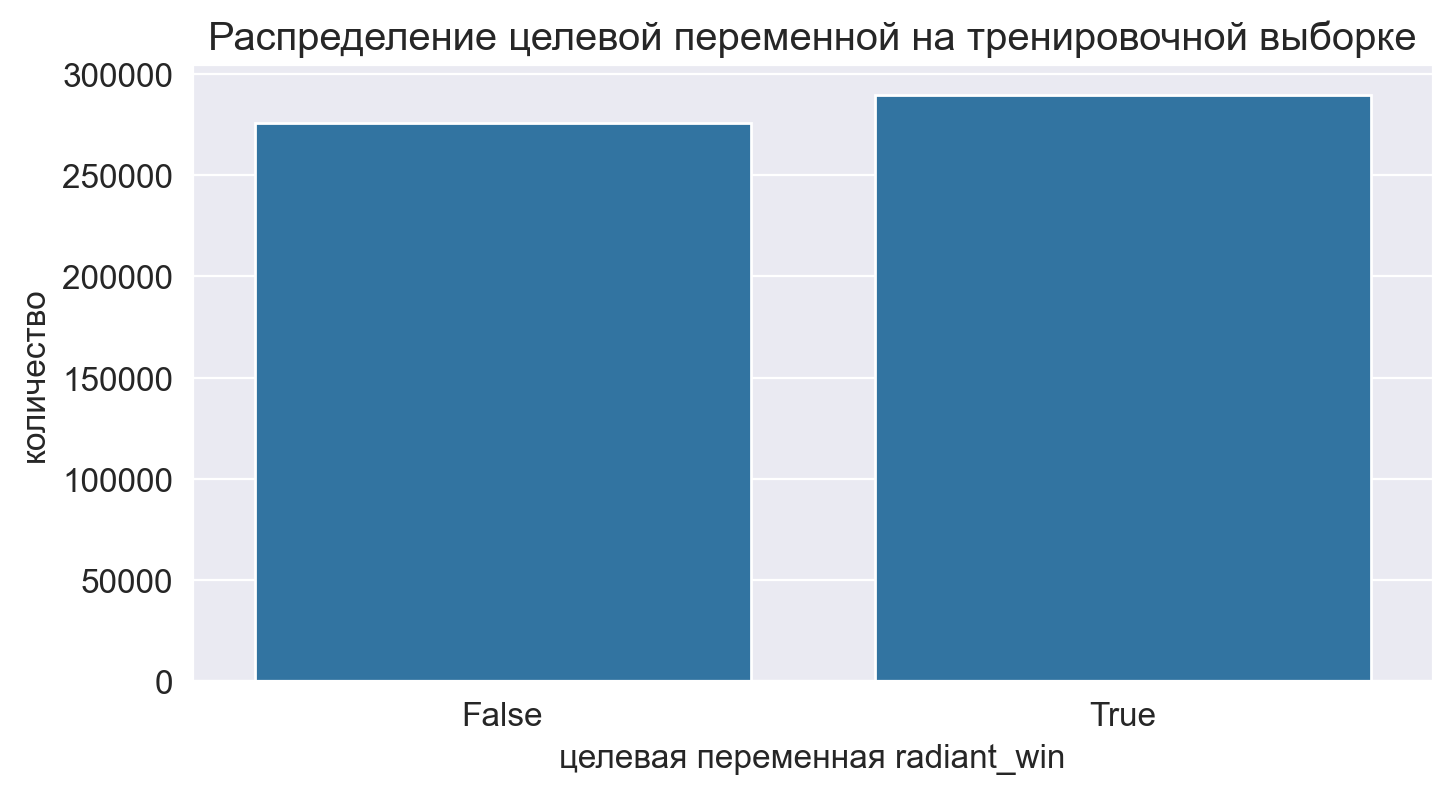

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Распределение целевой переменной на тренировочной выборке')
plt.ylabel('количество')
plt.xlabel('целевая переменная radiant_win')
plt.savefig('figure1.pdf', format='pdf')
plt.show()

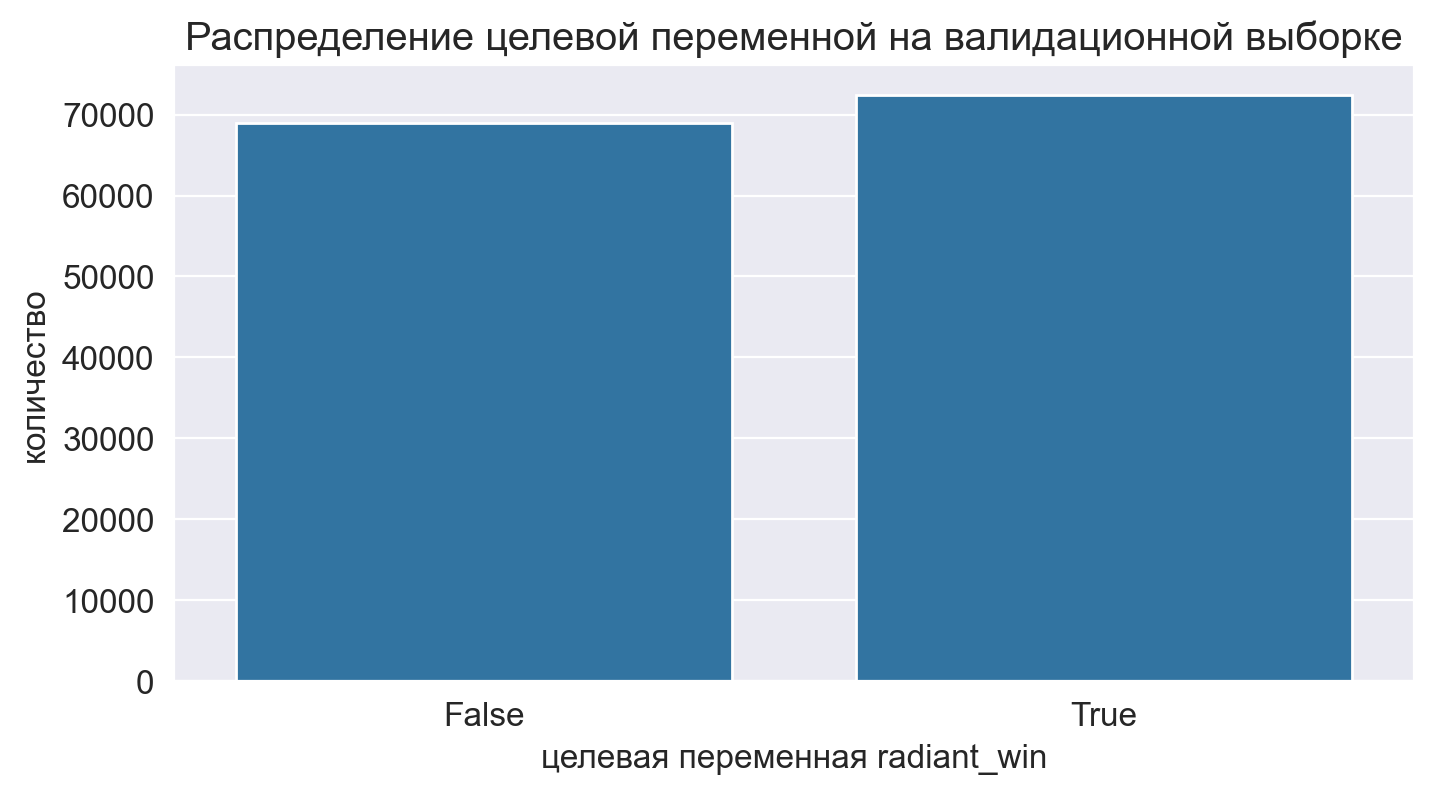

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_val)
plt.title('Распределение целевой переменной на валидационной выборке')
plt.ylabel('количество')
plt.xlabel('целевая переменная radiant_win')
plt.savefig('figure1.pdf', format='pdf')
plt.show()

#### Задание 1.2. Бейзлайн (0.5 балла)

На сей раз мы будем решать задачу классификации, поэтому нам понадобится соответствующая модель. В целом, наши данные уже содержат признаки, по которым что-то даже можно построить.

1. Выберите один или несколько признаков, по которым планируете предсказывать целевую переменную (здесь не нужно придумывать ничего адового, можете даже не делать никаких трансформов, ими мы займемся позже).

Пусть это будут 'region', 'game_mode', 'duration'

2. Выберите модель по вашему вкусу, главное, чтобы она была из `sklearn.linear_model` и не была перцептроном. **Любые другие модели, кроме линейных, запрещены!!!**
3. Обучите модель и замерьте качество.

Качество получилось слишком хорошим, Gini ~ 98% на тренировочной выборке и валидации. Такая ситуация возможно сложилась из-за признака date, это временной признак, возможна утечка данных или сильная скоррелированность с победами. В дальнейшем при работе с данными этот признак стоит заменить на день недели и месяц.

In [23]:
#Я выбрала LogisticRegression
from sklearn.linear_model import LogisticRegression

In [24]:
#Обучаем модель и делаем предикт
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

In [25]:
print(gini(y_train, train_predict))
print(gini(y_val, val_predict))

0.04115330765560343
0.042887194458257394


### **Задание 2. Оптимизация для уже смешариков (2 балла)** <img align="center" src="https://cdn.7tv.app/emote/01H8RPMSBR000133946WK71YXM/1x.avif">

#### Задание 2.1. Optuna для самых маленьких (0.75 балл)

**NB: Хотя это задание и опциональное, выполнить его настоятельно рекомендуется, оно будет очень полезно сейчас, в этой дз, и вообще!**

Не стоит забывать, что у любой модели есть гиперпараметры. Конечно, львиная доля качества будет идти от фичей, но гиперпараметры списывать со счетов тоже не стоит. В конце концов, может быть, что с набором фичей, который считался безперспективным, оптимизированная модель покажет лушее качество, чем модель на топовых фичах, вот и посмотрим.

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. Подумаем, как это делать умнее.

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас.

Будем разбираться с этим поэтапно.

1. Напишите функцию оптимизации для логистической регрессии. Можете воспользоваться шаблоном ниже, хотя, конечно, это необязательно.
2. Подберите хотя бы 2 гиперпараметра для выбранной вами модели.

In [26]:
import optuna

In [27]:
def objective(trial, X_train, X_val):

    # гипепараметры модели
    model_params = {
        'C': trial.suggest_float('C', 0.001, 10),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }
    #Обучение и предикт модели
    model_2 = LogisticRegression(random_state=42, **model_params)
    model_2.fit(X_train, y_train)
    val_predict = model_2.predict(X_val)
    gini_valid = gini(y_val, val_predict)

    return gini_valid

Убедитесь, что ваша функция работает и модель как минимум работает не хуже, чем без всякого перебора параметров. Качество может вырасти, но очень незначительно, поскольку мы все еще работаем с бейзлайном.

В пункте 2.2 проведено оценка модели с подбором параметров. На валидационной выборке метрика Джини также ~98%, значит функция написана правильно

#### Задание 2.2. Логирование в optuna (0.75 балла)

Оптуна - это великая библиотека еще и потому, что сразу предлагает удобный инструментарий для логирования экспериментов.

Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин.

Что от вас требуется:
- отдельный `storage`, который сохраняет результаты локально, а не только в рамках одной сессии. В любом удобном для вас виде: хоть датафрейм, хоть БД (в `optuna` для этого есть специальный класс, поищите).
- логирование разных экспериментов с разным именем, чтобы иметь возможность их сравнивать (например, `linreg_base` для бейзлайна регрессии, `logreg_yoba_features_ultrafinal` для самого лучшего логрега, главное, чтобы вам это было понятно и можно было адекватно сравнить перформанс разных моделей, ничего не потеряв).

In [28]:
#Логирование экспериментов с разным именем
#Назовем базовой модель со всеми параметрами
study_logreg_basic = optuna.create_study(direction='maximize')
study_logreg_basic.optimize(lambda trial: objective(trial, X_train, X_val), n_trials=100)
#Запись результатов в файл
storage_logreg_basic = study_logreg_basic.trials_dataframe()
storage_logreg_basic.to_csv('logreg_basic_results.csv')
print(study_logreg_basic.best_params)

#Разбиваем данные для второй модели с новыми признаками
categorical = ['region', 'game_mode']
numeric = ['duration']
column_transformer2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])
X = data_matches_cleaned[categorical + numeric]
X_train_best, X_val_best, y_train_best, y_val_best = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_best = column_transformer2.fit_transform(X_train_best)
X_val_best = column_transformer2.transform(X_val_best)
#Во второй модели будут признаки 'region', 'game_mode'
study_logreg_best = optuna.create_study(direction='maximize')
study_logreg_best.optimize(lambda trial: objective(trial, X_train_best, X_val_best), n_trials=100)
#Запись результатов в файл
storage_logreg_best = study_logreg_best.trials_dataframe()
storage_logreg_best.to_csv('logreg_best_results.csv')
print(study_logreg_best.best_params)

[I 2025-11-06 23:39:50,702] A new study created in memory with name: no-name-0a0b3305-e793-45a5-a390-4d7d03d5748b
[I 2025-11-06 23:39:51,481] Trial 0 finished with value: 0.042900995556824695 and parameters: {'C': 4.757371126124235, 'max_iter': 440}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:39:52,269] Trial 1 finished with value: 0.042887194458257394 and parameters: {'C': 0.976004162947101, 'max_iter': 985}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:39:53,122] Trial 2 finished with value: 0.042900995556824695 and parameters: {'C': 5.713628710334925, 'max_iter': 944}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:39:53,977] Trial 3 finished with value: 0.042887194458257394 and parameters: {'C': 0.7945149691930814, 'max_iter': 918}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:39:55,027] Trial 4 finished with value: 0.042900995556824695 and parameters: {'C': 6.396705353856763, 'max_iter': 390}. 

{'C': 4.757371126124235, 'max_iter': 440}


[I 2025-11-06 23:41:12,831] A new study created in memory with name: no-name-61309e9e-62c5-4a87-a500-9227673ccd7b
[I 2025-11-06 23:41:13,624] Trial 0 finished with value: 0.042900995556824695 and parameters: {'C': 4.631475415154952, 'max_iter': 331}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:41:14,531] Trial 1 finished with value: 0.042900995556824695 and parameters: {'C': 7.013616513977832, 'max_iter': 806}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:41:15,353] Trial 2 finished with value: 0.042900995556824695 and parameters: {'C': 7.098792456092967, 'max_iter': 672}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:41:16,183] Trial 3 finished with value: 0.042900995556824695 and parameters: {'C': 5.982431196945069, 'max_iter': 863}. Best is trial 0 with value: 0.042900995556824695.
[I 2025-11-06 23:41:16,999] Trial 4 finished with value: 0.042900995556824695 and parameters: {'C': 6.13583708953513, 'max_iter': 571}. Be

{'C': 0.00612875514958322, 'max_iter': 164}


In [29]:
model_3 = LogisticRegression(random_state=42, C=5.684497609694415, max_iter=767)
model_3.fit(X_train, y_train)
val_predict = model.predict(X_val)
print(gini(y_val, val_predict))

0.042887194458257394


#### Задание 2.3. Базовый feature selection (0.5 балла)

У любой модели, помимо этапа тюнинга во время обучения, зачастую есть и тюнинг после обучения. Готовы поспорить, что из сотен признаков, что вы потенциально можете нагенерить в данном задании, большинство окажутся вовсе бесполезными. Подробнее с методами feature selection мы познакомимся позже, но уже сейчас мы можем воспользоваться знанием, что к примеру L1-регуляризация может занулять ненужные веса, и что коэффициент у нормированных весов отражает, насколько этот вес важен.

Попробуйте встроить примитивный алгоритм feature selection:
- после обучения модели будем проверять по фиксированной сетке [25%, 50%, 75%, 100%], сколько фичей хотим оставить;
- для каждого значения сетки замеряем качество алгоритма и логгируем в оптуну значение метрики для данного процента фичей;
- для выбора оптимальной модели храним не самое лучшее значение Джини, а самое лучшее значение с учетом оставшегося количества признаков.

In [30]:
#Обучаем модель с L1-регуляризацией для определения важности фичей
model_l1 = LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
model_l1.fit(X_train, y_train)
#Получаем важность признаков
feature_importance = np.abs(model_l1.coef_[0])
#Сортируем фичи по важности
sorted_indices = np.argsort(feature_importance)[::-1]
mas_percentage = [0.25, 0.5, 0.75, 1]
gini_best = 0
best_percent = 0
#Смотрим модель с каким процентом важных признаков будет работать лучше (делаем цикл по количеству признаков)
for percent in mas_percentage:
    #Смотрим индексы лучших признаков * процент, который берем
    top_indices = sorted_indices[:round(X_train.shape[1] * percent)]
    X_train_p = X_train[:, top_indices]
    X_val_p = X_val[:, top_indices]
    #Обучаем модель
    model_4 = LogisticRegression(random_state=42)
    model_4.fit(X_train_p, y_train)
    val_predict = model_4.predict(X_val_p)
    gini_valid = gini(y_val, val_predict)
    #Если метрика Джини увеличилась, меняем лучший процент
    if gini_valid > gini_best:
        gini_best = gini_valid
        best_percent = percent

In [31]:
print(best_percent)

0.5


Далее вы можете либо тестить фичи на дефолтной модели, либо тюнить ее после каждого изменения. Выбор, как обычно, за вами.

### **Задание 3. Простейший EDA (2.5 балла)** <img height=40px src="https://cdn3.emoji.gg/emojis/136857-pepesmoke.gif">

Чтобы построить реально балдежную модель, зачастую не получится просто жахнуть фит предиктов и пойти пить смузи, пока параметры крутятся сами. Неет, зачастую для этого требуется долгая и утомительная возня с графиками. А если необходима еще и отчетность, то и без графиков совсем не обойтись. Так и у нас. Конечно, никаких экстремальных признаков наш датасет не содержит, но и того, что есть, хватит, чтобы продемонстрировать темную сторону любого Data Science.

Задания ниже призваны скорее познакомить вас с данными, а заодно показать несколько простых способов анализировать данные, которые, в целом, никогда не помешают при работе с любыми признаками, хотя обычно так подробно смотрят лишь на самые потенциально важные факторы.

В заданиях пункта 3 всегда требуется:
- аргументировать, почему вы делаете такое решение;
- обучить модель по итогам выполнения пункта;
- сделать вывод, зашел признак или нет, и ваше мнение, почему так получилось.

In [32]:
# ヾ(⌐■_■)ノ♪ your code here

#### Задание 3.1. Пропуски в данных (0.5 балла)

В реальной жизни все обычно гораздо хуже, чем в вылизанных датасетах, и наши данные, увы не исключение. Колонка `duration`, которую вы могли использовать, а могли и не использовать для обучения, доступна лишь на обучающих данных, но не на тестовых. Если вы хотите опираться на длительность матча для предсказания победы, сперва эту длительность необходимо как-то достать.

У вас есть несколько возможностей это сделать:

1. Заполнить пропуски на валидационной и тестовой выборках константным значением.
2. Попробовать предсказать значение `duration` при помощи простенькой линейной модели.
3. Добавить отсутствие значения отдельным признаком.

Задание заключается в следующем:

1. Посмотрите на распределение `duration`, подберите визуализацию, которая покажет это наиболее наглядно.
2. Сделайте вывод о том, какое из выше представленных решений лучше всего поможет.
3. Заполните пропуски.

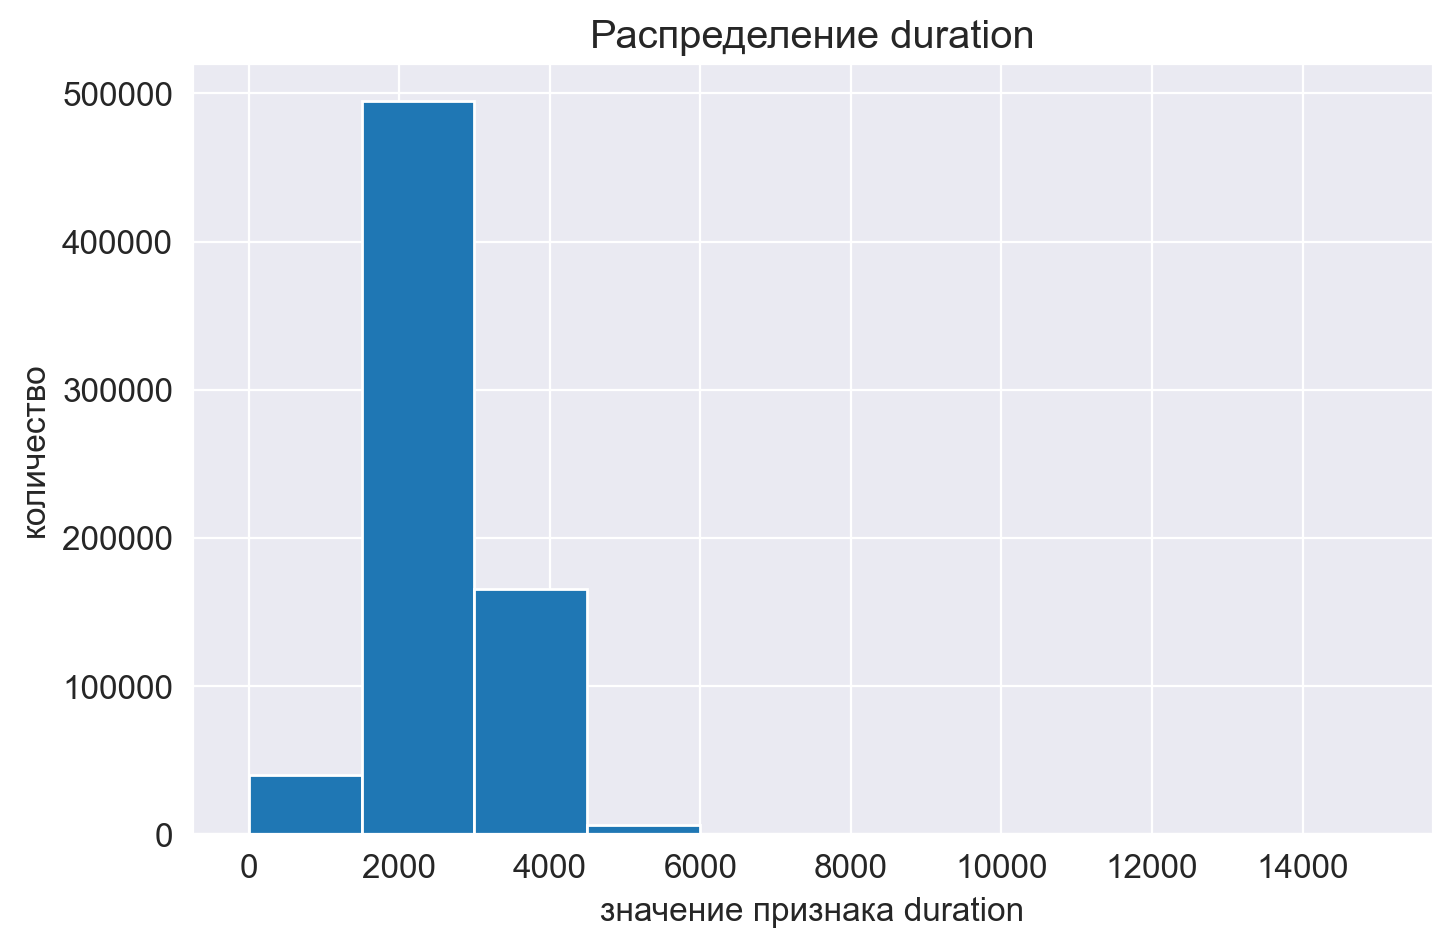

In [33]:
#Строим распределение duration (гистограмму)
plt.hist(data_matches_cleaned['duration'])
plt.title('Распределение duration')
plt.ylabel('количество')
plt.xlabel('значение признака duration')
plt.savefig('figure2.pdf', format='pdf')
plt.show()

Видно, что у duration есть большой хвост слева, лучше убрать выбросы

In [34]:
data_matches_cleaned = data_matches_cleaned[data_matches_cleaned['duration'] <= 6000]
data_matches_cleaned = data_matches_cleaned.copy()

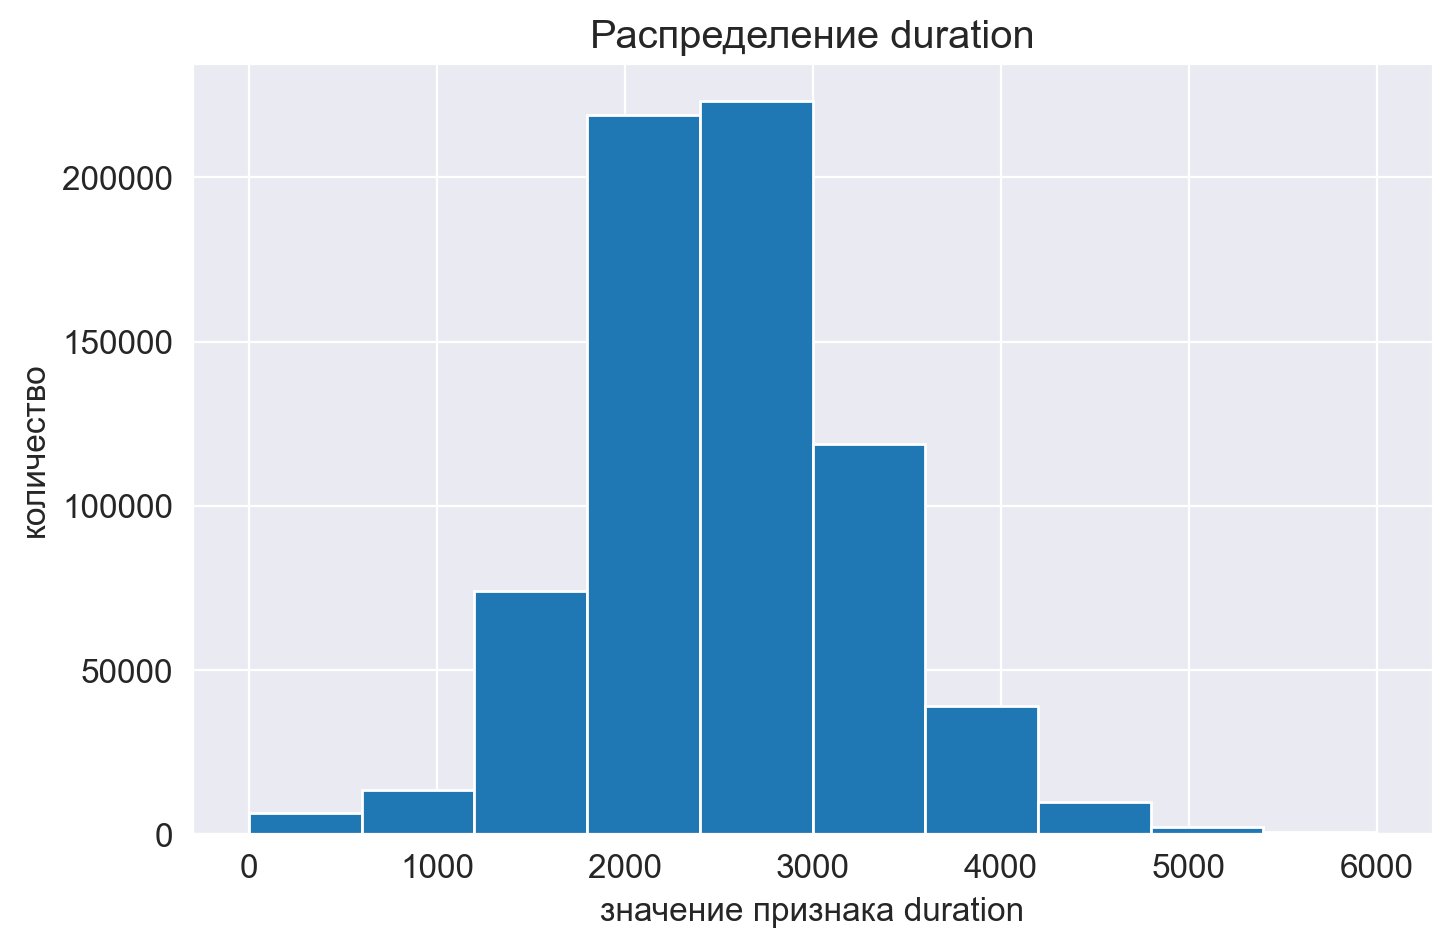

In [35]:
plt.hist(data_matches_cleaned['duration'])
plt.title('Распределение duration')
plt.ylabel('количество')
plt.xlabel('значение признака duration')
plt.savefig('figure3.pdf', format='pdf')
plt.show()

Следует также построить боксплот, чтобы увидеть, где есть выбросы

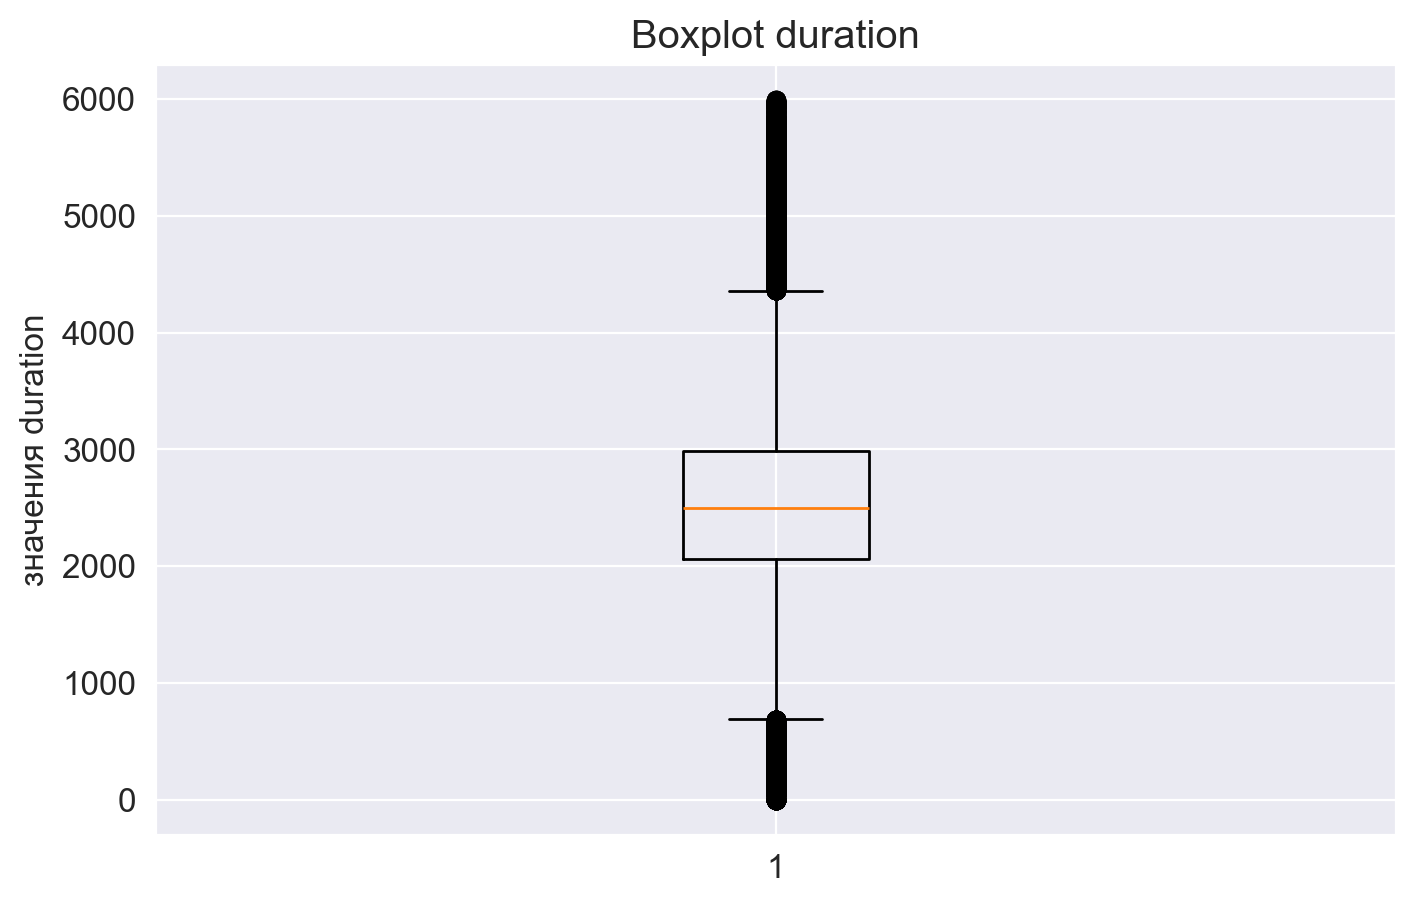

In [36]:
plt.boxplot(data_matches_cleaned['duration'])
plt.title('Boxplot duration')
plt.ylabel('значения duration')
plt.savefig('figure4.pdf', format='pdf')
plt.show()

Выбросы где-то до значения признака 750 и после 4250. Попробуем убрать

In [37]:
data_matches_cleaned = data_matches_cleaned[(data_matches_cleaned['duration'] <= 4250) & (data_matches_cleaned['duration'] >= 750)]
data_matches_cleaned = data_matches_cleaned.copy()

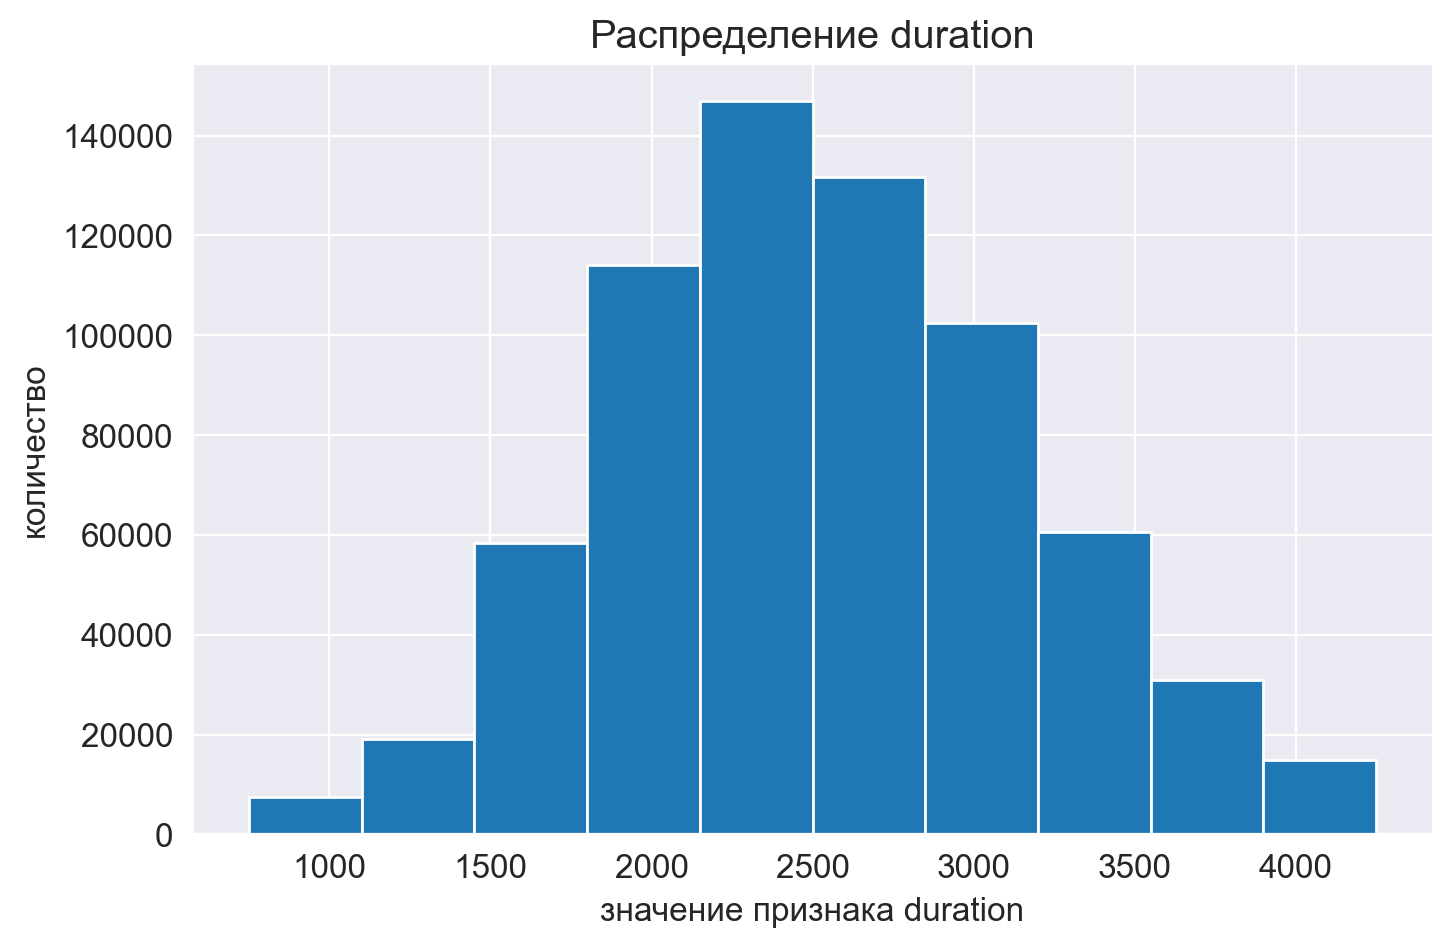

In [38]:
plt.hist(data_matches_cleaned['duration'])
plt.title('Распределение duration')
plt.ylabel('количество')
plt.xlabel('значение признака duration')
plt.savefig('figure5.pdf', format='pdf')
plt.show()

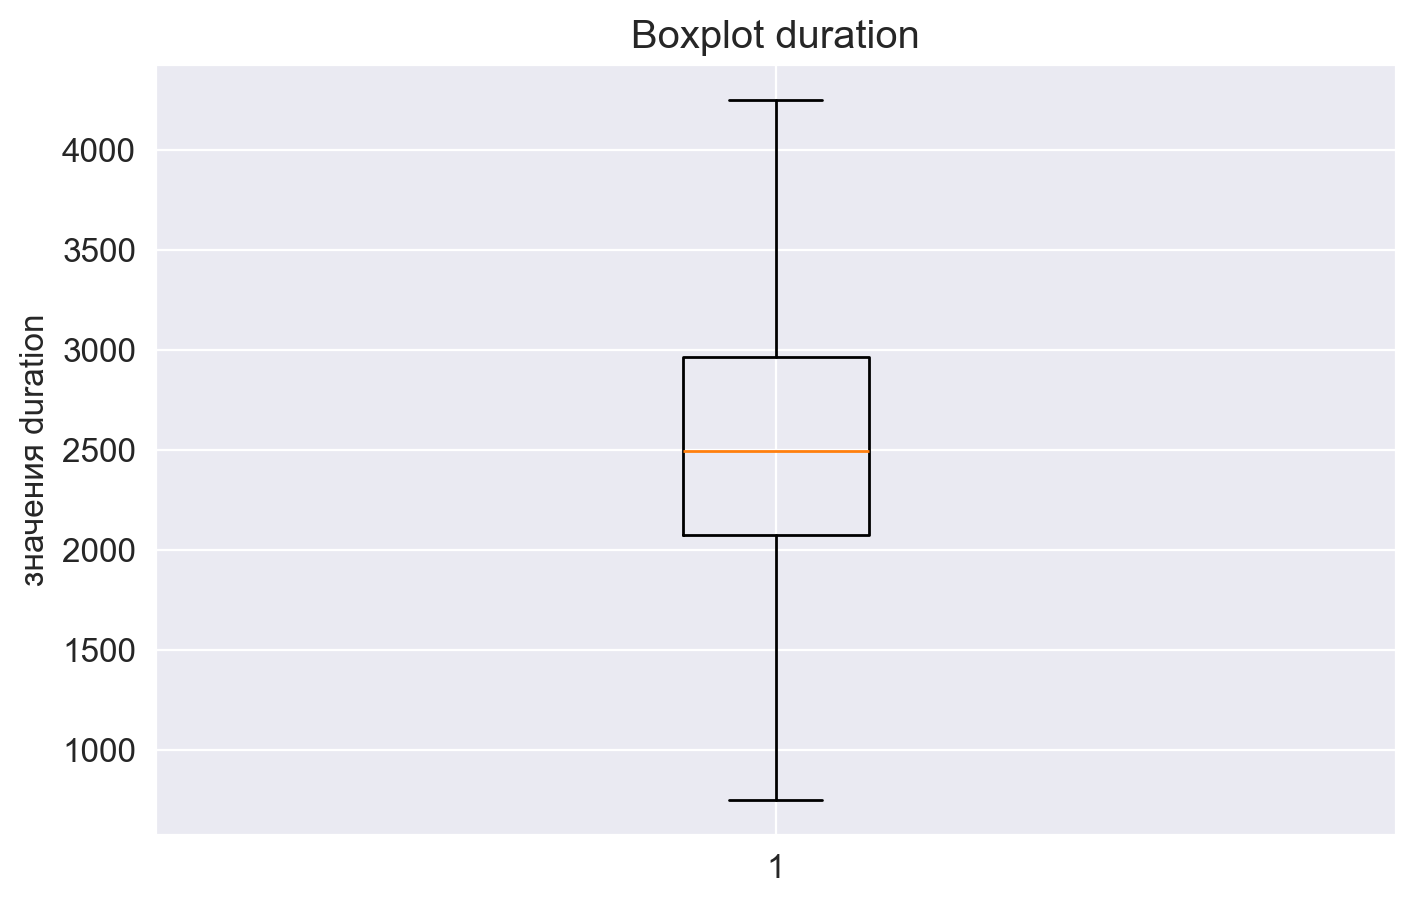

In [39]:
plt.boxplot(data_matches_cleaned['duration'])
plt.title('Boxplot duration')
plt.ylabel('значения duration')
plt.savefig('figure6.pdf', format='pdf')
plt.show()

Теперь гистограмма похожа на нормальное распределение, а боксплот выглядит симметричным и не имеет выбросов

Можно было бы попробовать предсказать duration с помощью линейной модели, но признаков мало и приедтся использовать те же, что и в классификаторе, что может привести к проблеме. Поэтому воспользуемся медианным значением по определенным параметрам. Если же все заполнить константой, признак не будет работать в модели классификации. Отметить флагом отсутсвие признака тоже может не подойти, так как у тестовой выборки вообще нет этого столбца, так как мы пытаемся предсказать исход в начале игры.

Для начала разобьем признак date на month и day_of_week, так как вряд ли матчи проходили в один день, так легче будет сгруппировать и найти медианное значение (с полной датой группы могут быть с 0 объектов)

In [40]:
data_matches_cleaned['dayofweek'] = data_matches_cleaned['date'].dt.day_of_week
data_matches_cleaned['month'] = data_matches_cleaned['date'].dt.month
data_test_cleaned['dayofweek'] = data_test_cleaned['date'].dt.day_of_week
data_test_cleaned['month'] = data_test_cleaned['date'].dt.month

In [41]:
#Создаем словарь с медианами из трейна
median_dict = {}
median_dict = data_matches_cleaned.groupby(['game_mode', 'region', 'month'])['duration'].median().to_dict()
#Добавляем столбец duration в тестовую выборку (если нет такой группы, добавляется медиана по всему набору данных)
data_test_cleaned['duration'] = data_test_cleaned.apply(
    lambda row: median_dict.get(
        (row['game_mode'], row['region'], row['month']), 
        data_matches_cleaned['duration'].median()
    ), 
    axis=1
)

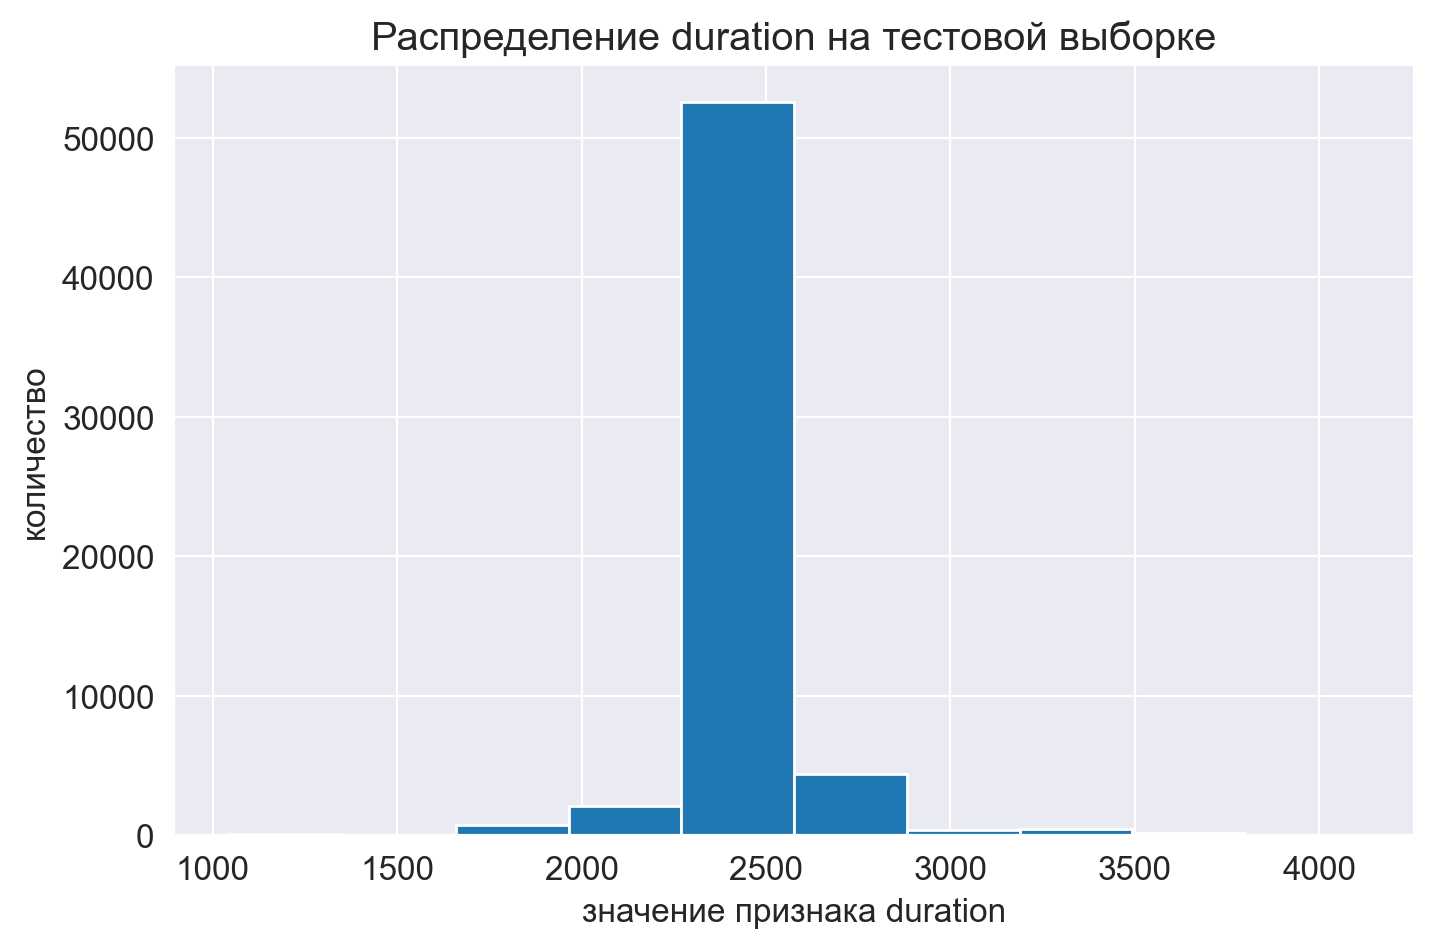

In [42]:
plt.hist(data_test_cleaned['duration'])
plt.title('Распределение duration на тестовой выборке')
plt.ylabel('количество')
plt.xlabel('значение признака duration')
plt.savefig('figure7.pdf', format='pdf')
plt.show()

Получилось не очень сбалансированно, но и не слишком плохо.

#### Задание 3.2. Простейшие преобразования (0.5 балла)

В жизни рядового датасаентиста часто возникает такая ситуация, что фича, которая ну должна быть клевой, на практике оказывается тем еще отстоем. Причин тому может быть несколько: признак действительно может быть нерелевантным, в данных банально может быть ошибка; либо же мы просто неправильно этот признак готовим. Народная мудрсть (и душнилы-математики) гласит, что признаки желательно подбирать из нормального распределения в случае L2-регуляризации, тогда как на практике это достигается ой как не всегда.

Сделаем следующее:

1. Посмотрите на гистограмму признака `duration`, если вы не сделали этого до. Что вы можете сказать про смещение, среднее, хвосты распределения этого признака?

В предыдцщем пункте была проделана обработка и построены гистограммы. Было сильное смещение влево, сильный хвост до значения 14000, после удаления выбросов медианное значение стало около 2500, среднее - 2527. Распределение похоже на нормальное, но с небольшим перекосом к большим значениям.

2. Изучите три распространенных способа сделать признак $y$ ($y$ здесь и ниже это `duration`, не таргет) чуть более нормальным:

$$y \rightarrow \log y,  \sqrt{y}, \frac{1}{y}$$

Посмотрите, что происходит с распределением, если применить каждое из них.

$\log y$, $\frac{1}{y}$ меньше похожи на нормальное распределение и имеют хвосты, лучше всего подходит признак корень из duration. Нужно найти его для тестовой выборки.

3. Попробуйте добавить все три вышеперечисленных трансформации, вместе с признаком $\exp{\log{y}}$ (это снова `duration`).

In [43]:
#Расчет среднего по признаку duration
print(data_matches_cleaned['duration'].mean())

2527.034272269691


In [44]:
data_matches_cleaned['log_duration'] = np.log(data_matches_cleaned['duration'])
data_matches_cleaned['sqrt_duration'] = np.sqrt(data_matches_cleaned['duration'])
data_matches_cleaned['1/duration'] = 1/(data_matches_cleaned['duration'])

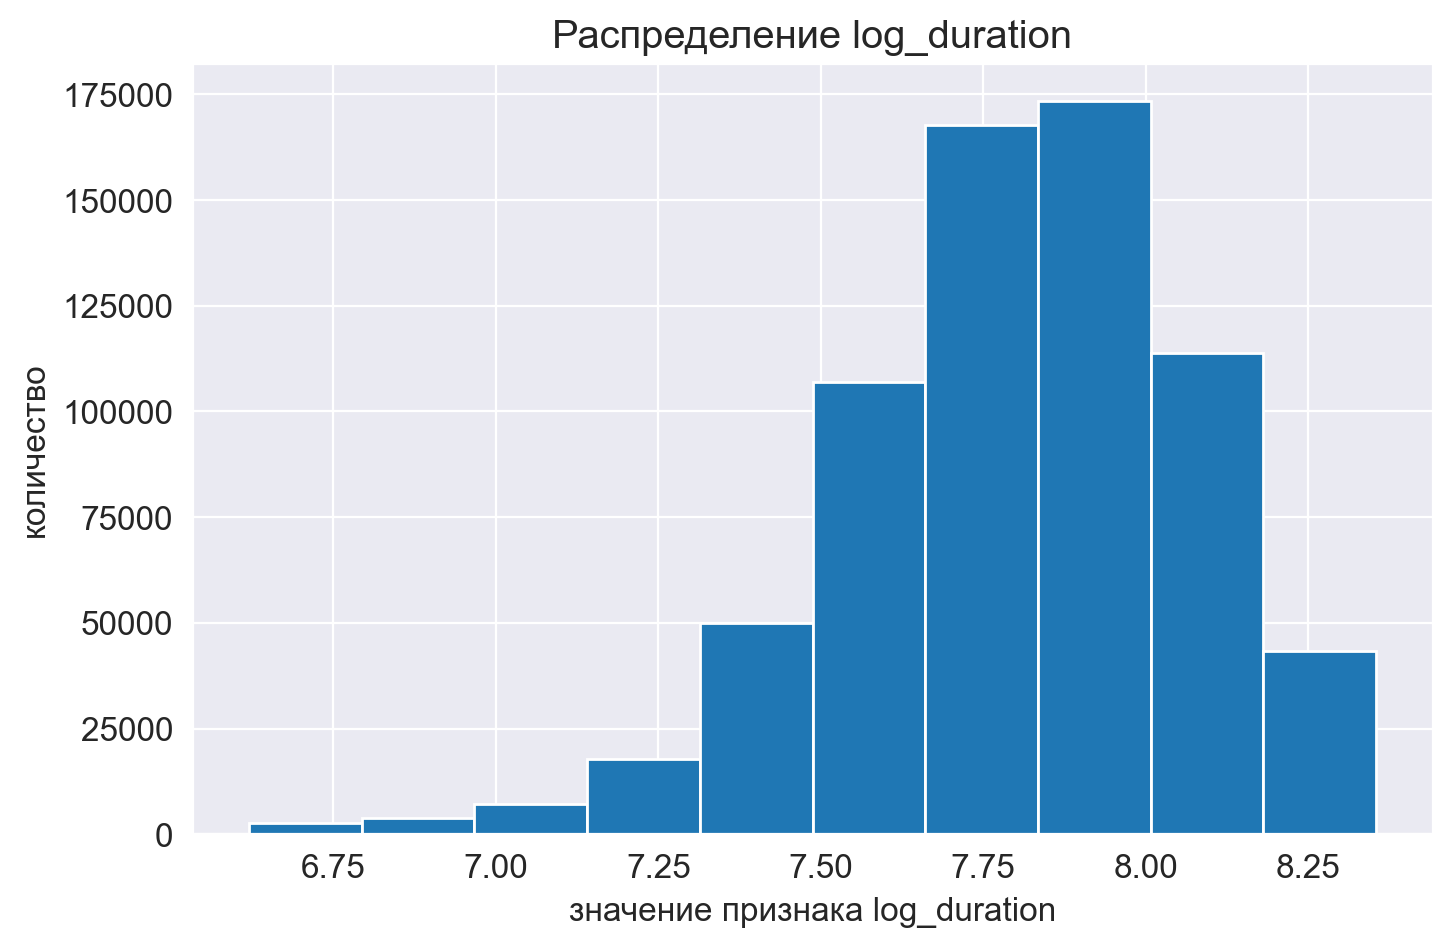

In [45]:
plt.hist(data_matches_cleaned['log_duration'])
plt.title('Распределение log_duration')
plt.ylabel('количество')
plt.xlabel('значение признака log_duration')
plt.savefig('figure8.pdf', format='pdf')
plt.show()

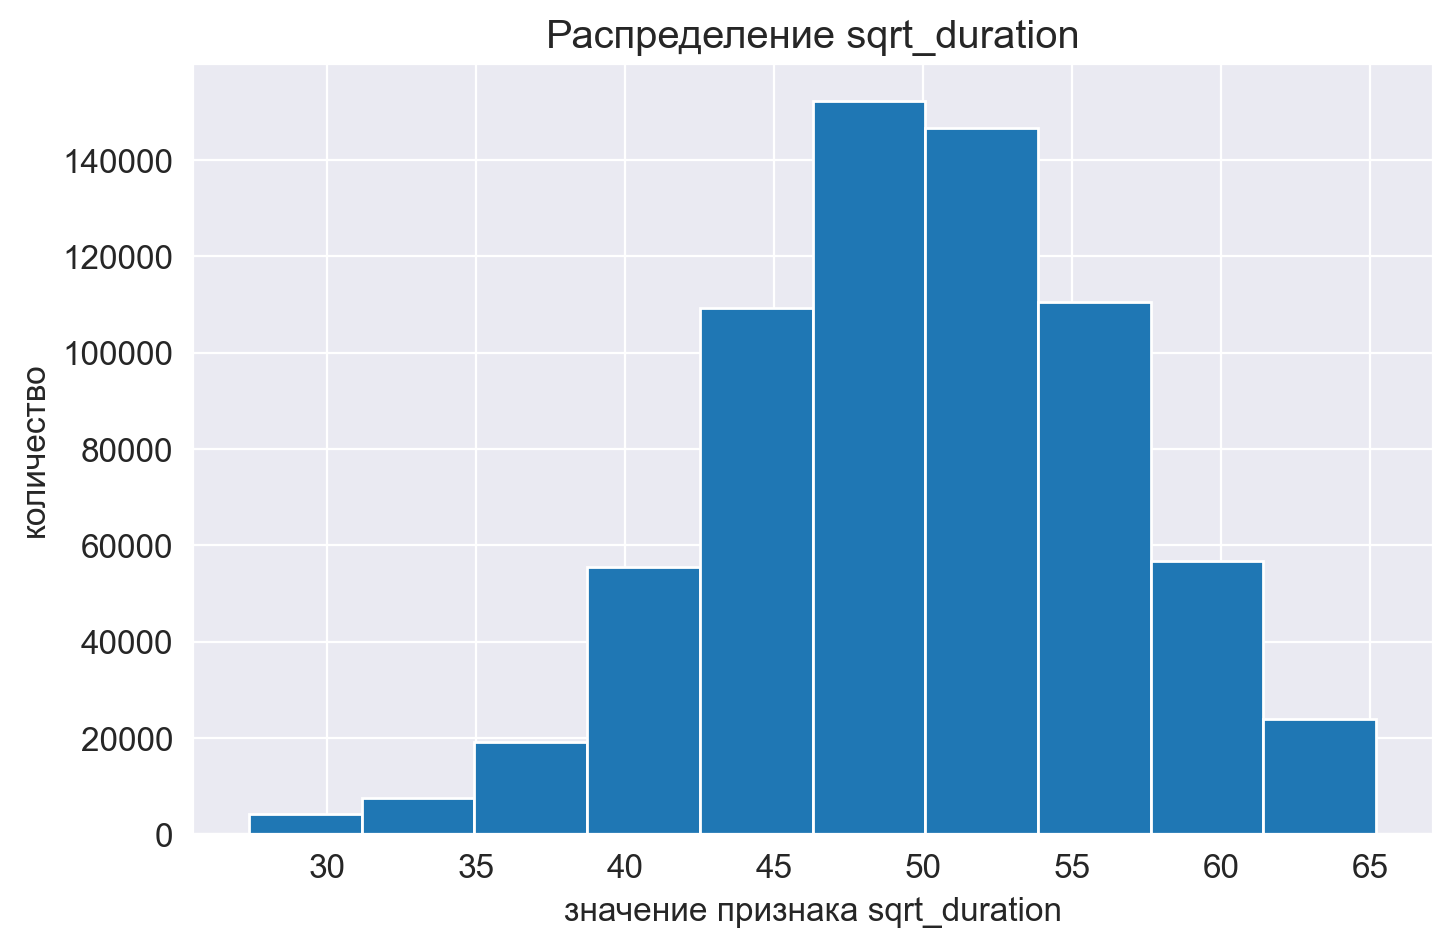

In [46]:
plt.hist(data_matches_cleaned['sqrt_duration'])
plt.title('Распределение sqrt_duration')
plt.ylabel('количество')
plt.xlabel('значение признака sqrt_duration')
plt.savefig('figure9.pdf', format='pdf')
plt.show()

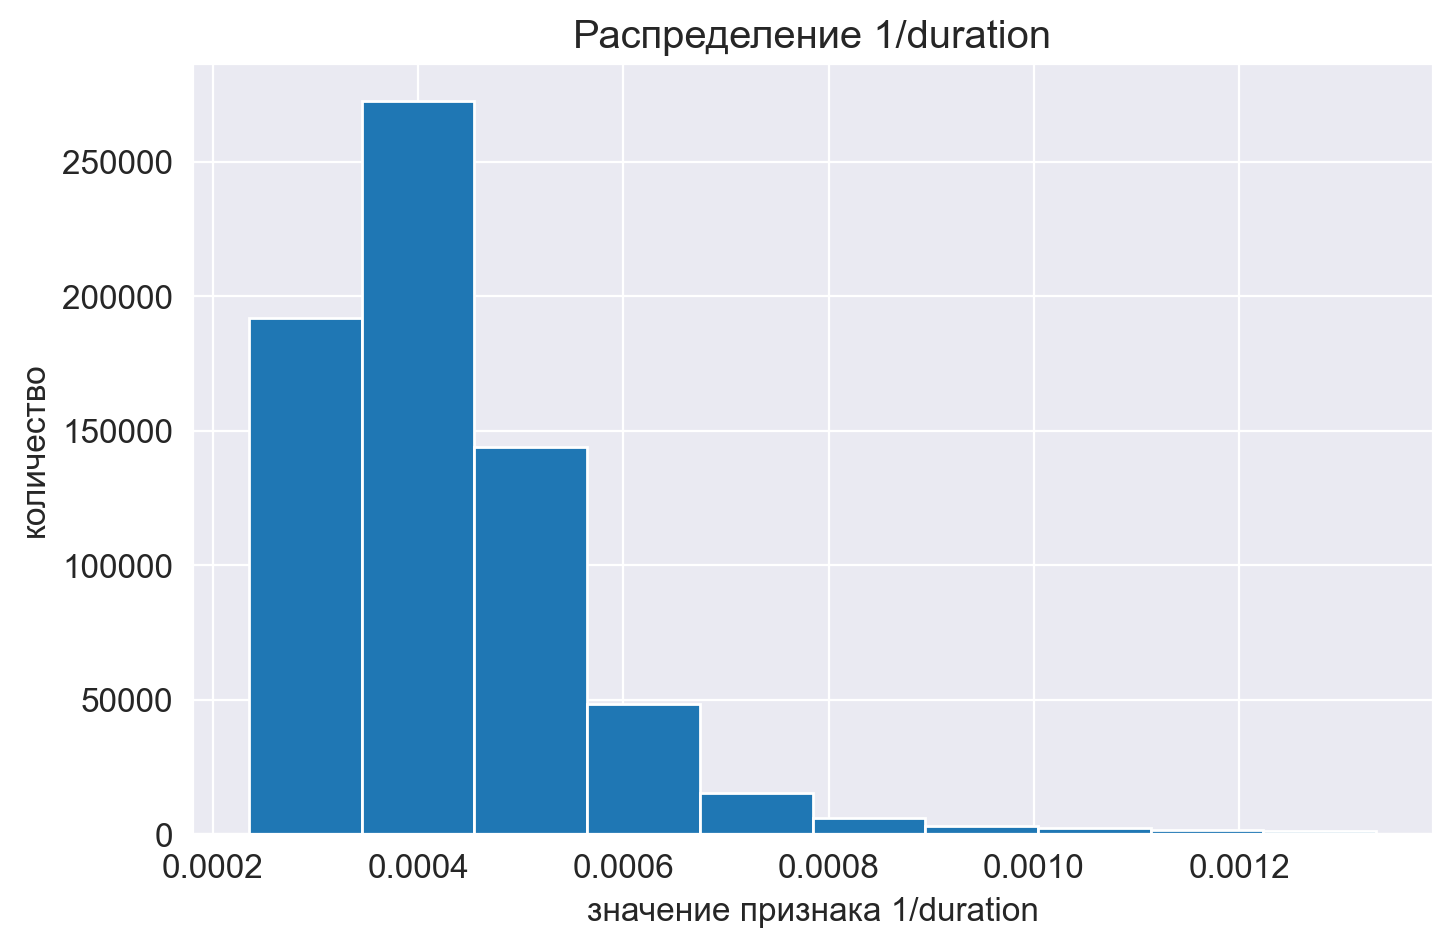

In [47]:
plt.hist(data_matches_cleaned['1/duration'])
plt.title('Распределение 1/duration')
plt.ylabel('количество')
plt.xlabel('значение признака 1/duration')
plt.savefig('figure10.pdf', format='pdf')
plt.show()

In [48]:
#Удаление хвоста у sqrt_duration
data_matches_cleaned = data_matches_cleaned[data_matches_cleaned['sqrt_duration'] >= 35]
data_matches_cleaned = data_matches_cleaned.copy()

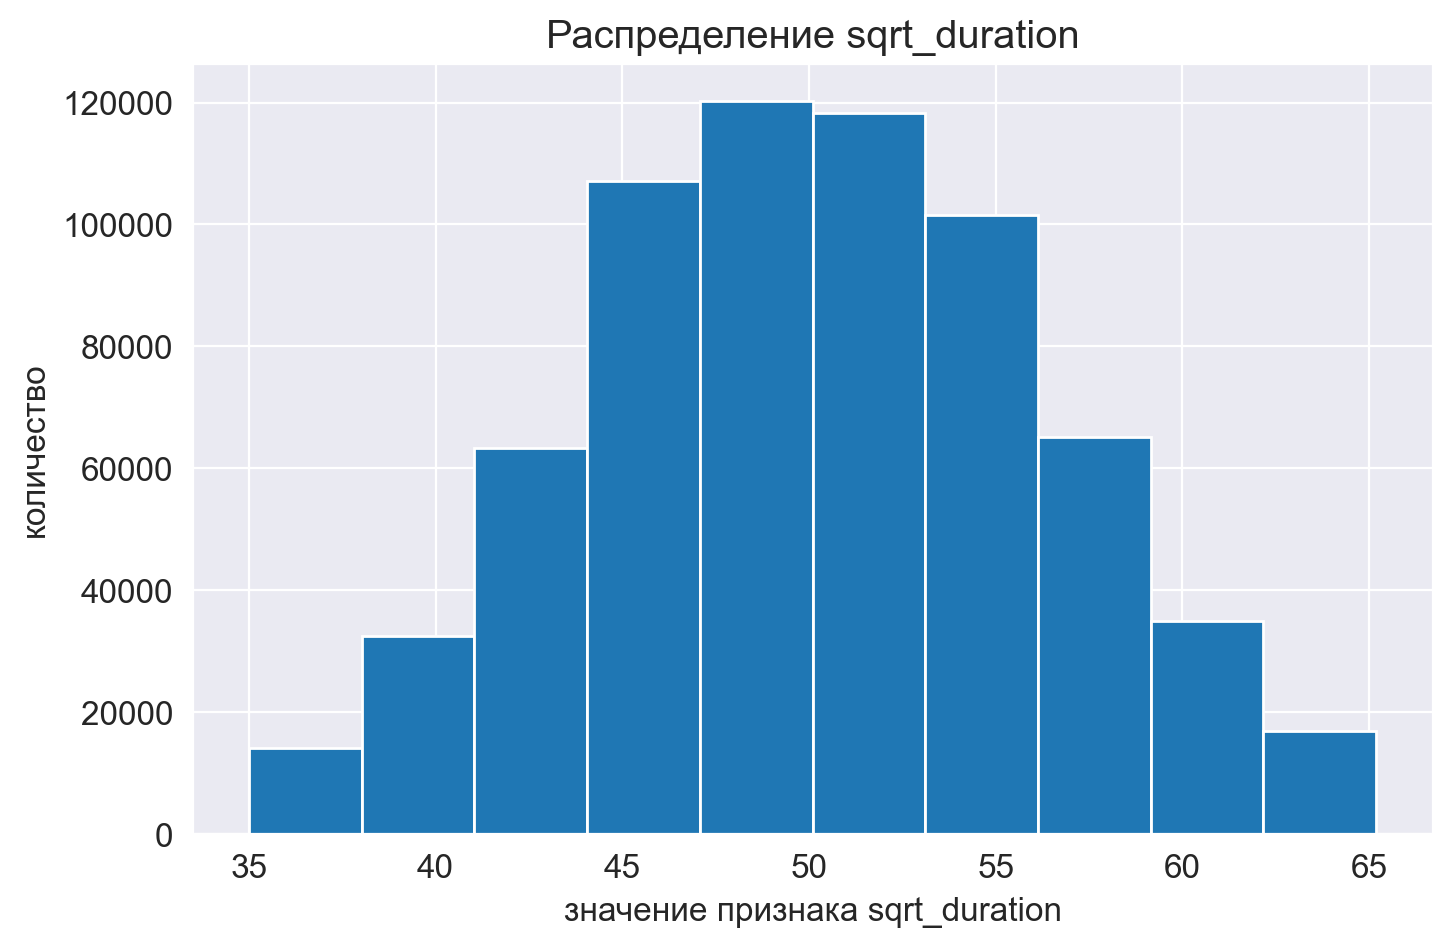

In [49]:
plt.hist(data_matches_cleaned['sqrt_duration'])
plt.title('Распределение sqrt_duration')
plt.ylabel('количество')
plt.xlabel('значение признака sqrt_duration')
plt.savefig('figure11.pdf', format='pdf')
plt.show()

In [50]:
#Добавление признака корень из duration в тестовую выборку
#Создаем словарь с медианами из трейна
median_dict = {}
median_dict = data_matches_cleaned.groupby(['game_mode', 'region', 'month'])['sqrt_duration'].median().to_dict()
#Добавляем столбец duration в тестовую выборку (если нет такой группы, добавляется медиана по всему набору данных)
data_test_cleaned['sqrt_duration'] = data_test_cleaned.apply(
    lambda row: median_dict.get(
        (row['game_mode'], row['region'], row['month']), 
        data_matches_cleaned['sqrt_duration'].median()
    ), 
    axis=1
)

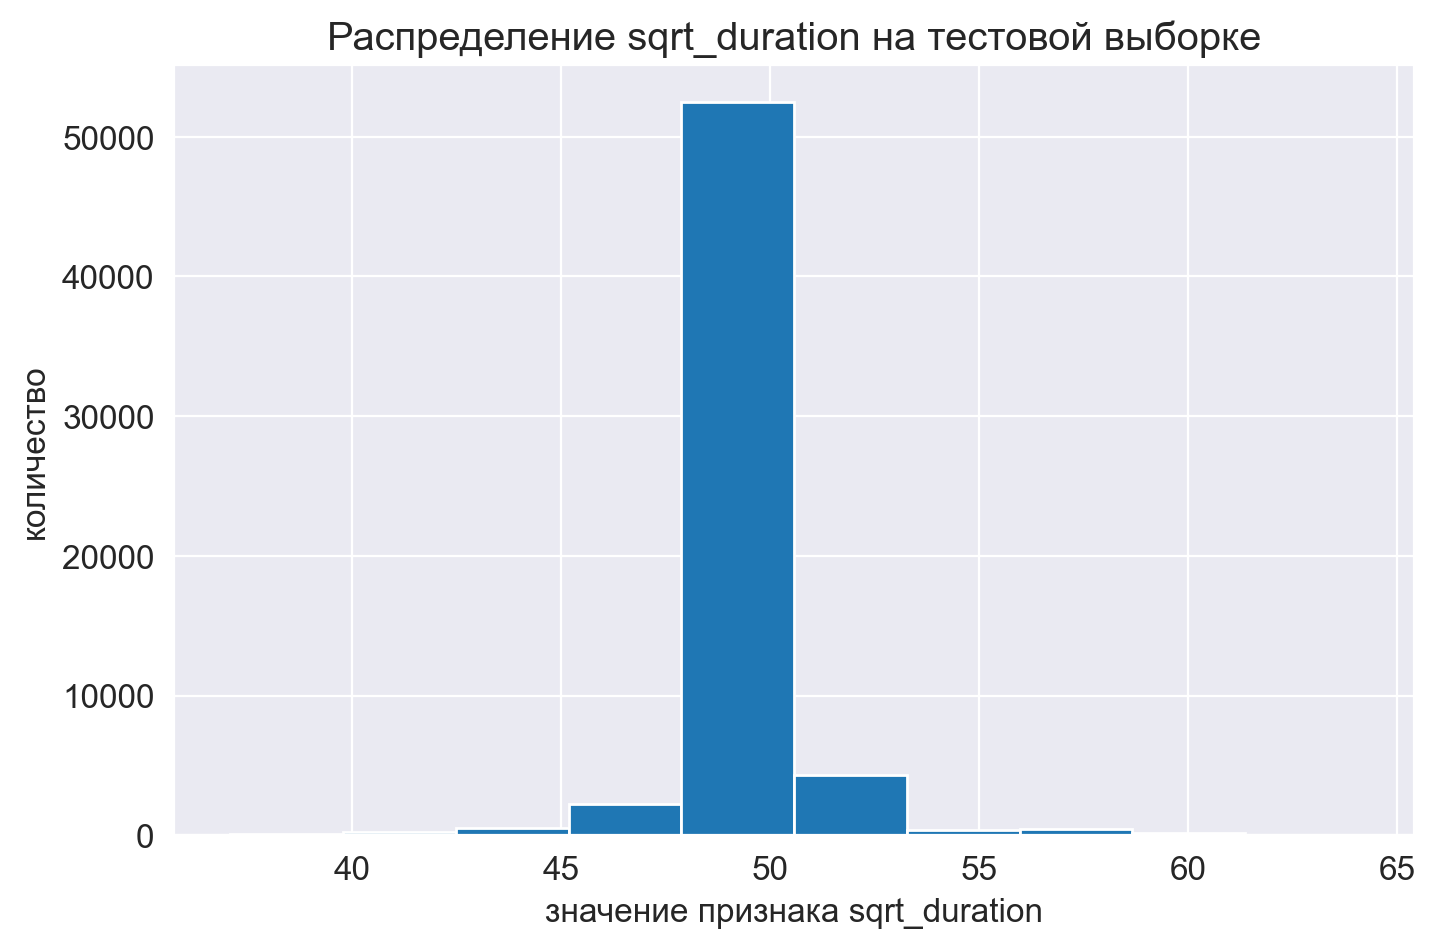

In [51]:
plt.hist(data_test_cleaned['sqrt_duration'])
plt.title('Распределение sqrt_duration на тестовой выборке')
plt.ylabel('количество')
plt.xlabel('значение признака sqrt_duration')
plt.savefig('figure12.pdf', format='pdf')
plt.show()

#### Задание 3.3. Регионы (0.5 балла)

Не секрет, что в отдельных регионах уровень скилла игроков отличается в лучшую или худшую сторону. Даже простые, казалось бы, признаки, иногда оказываются полезными, если распределения таргета на них по какой-то причине отличаются друг от друга.

Ваша задача:

1. Построить распределение категорий признака `region` на графике.
2. Проверить, отличается ли распределение целевой переменной для разных категорий `region`.
3. Закодируйте признак (как именно - на ваше усмотрение, но вам может очень понравиться вот [эта](https://contrib.scikit-learn.org/category_encoders) библиотека).

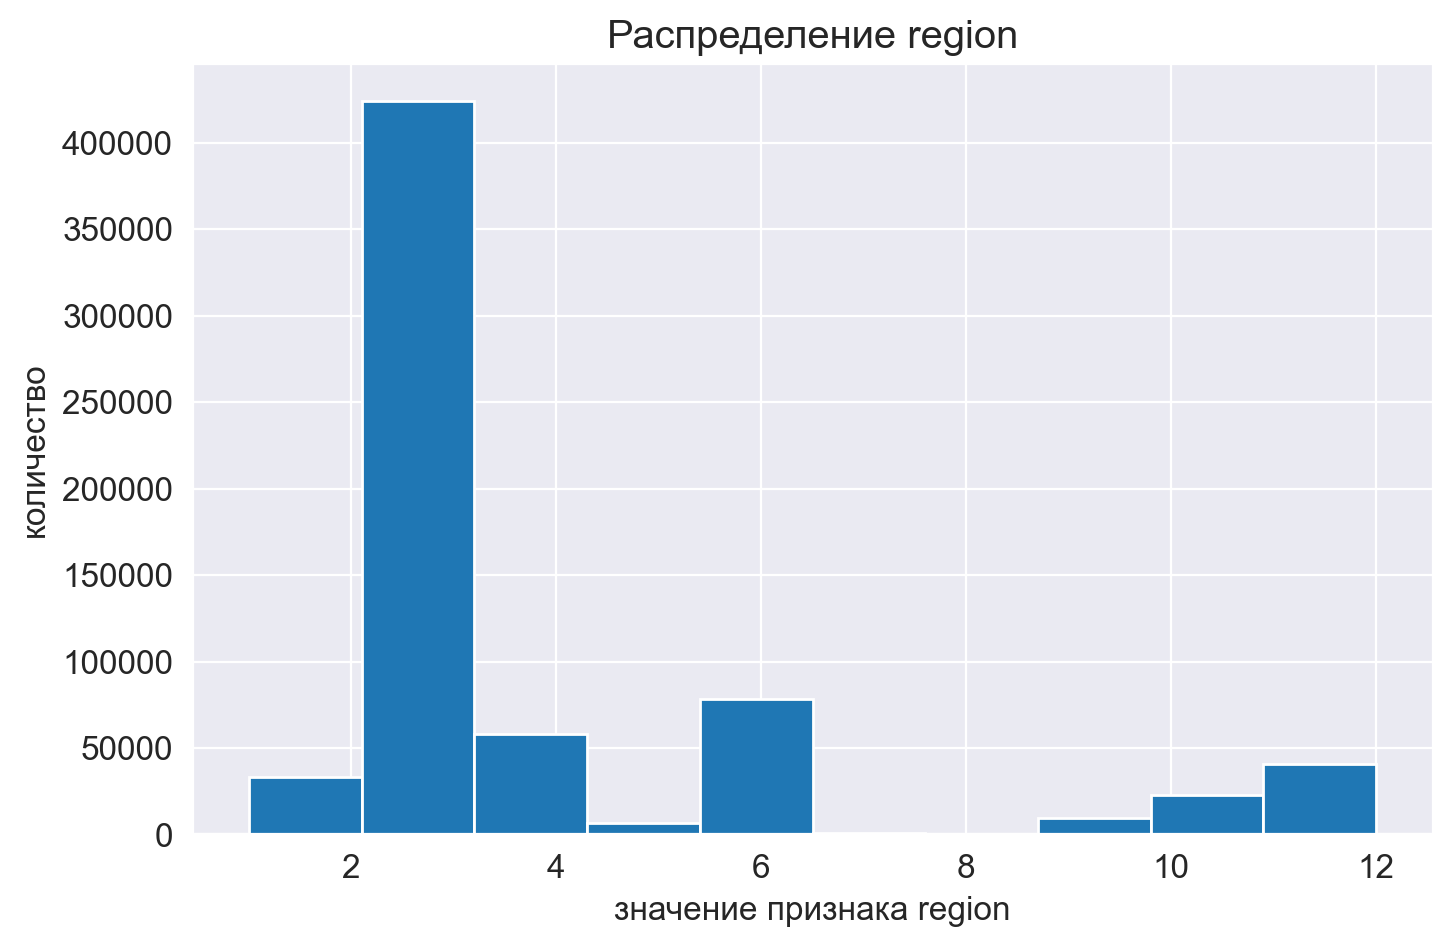

In [52]:
plt.hist(data_matches_cleaned['region'])
plt.title('Распределение region')
plt.ylabel('количество')
plt.xlabel('значение признака region')
plt.savefig('figure13.pdf', format='pdf')
plt.show()

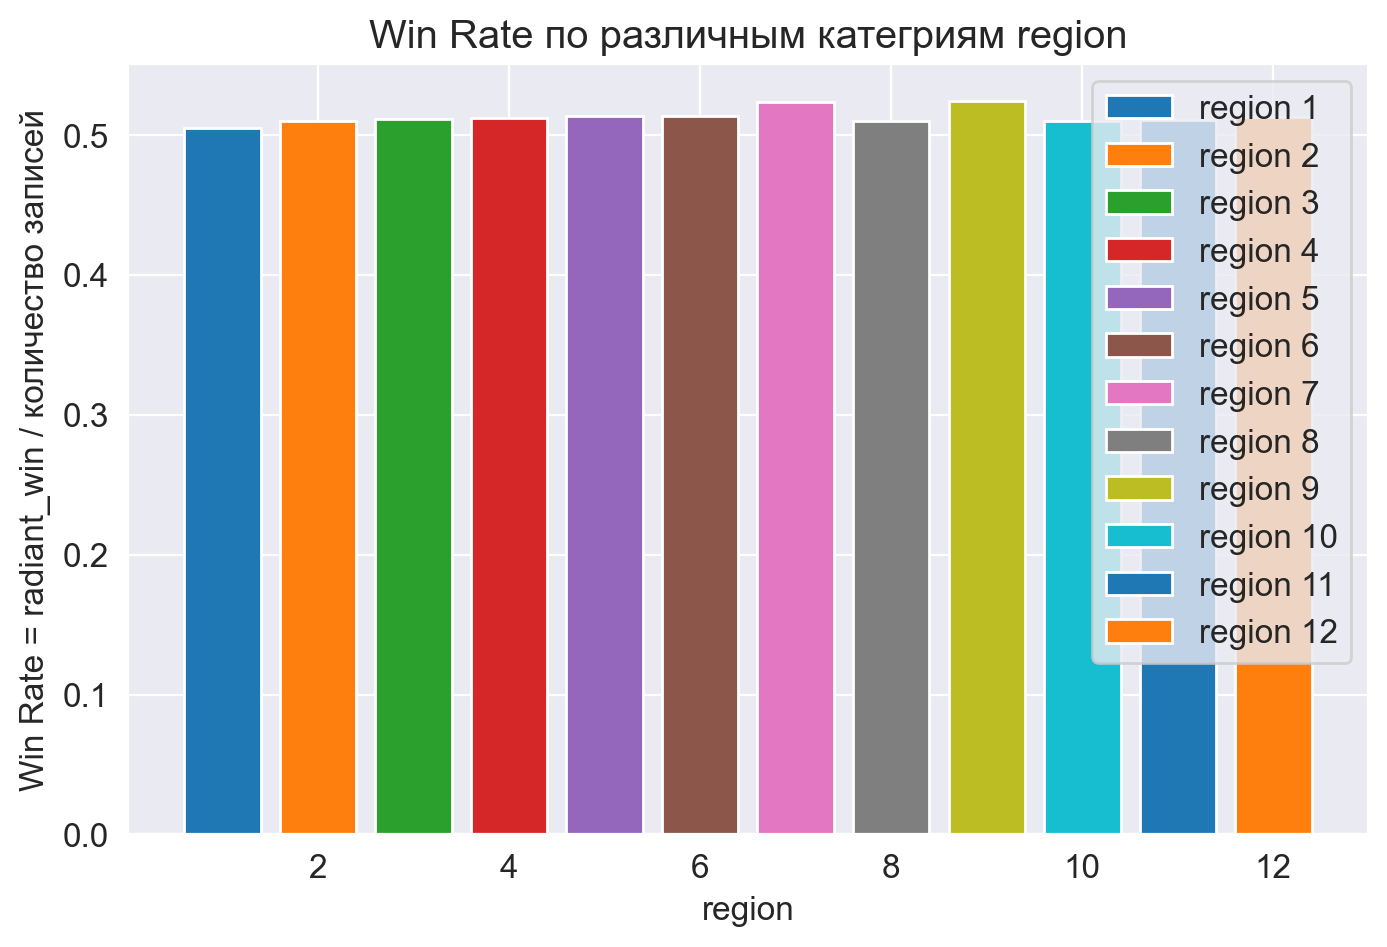

In [53]:
for region in range(1, 13):
    #Приходится брать среднее значение победы, так как гистограммы в данном случае выглядят хуже (цвета смешиваются)
    win_rate = data_matches_cleaned[data_matches_cleaned['region'] == region]['radiant_win'].astype(int).mean()
    plt.bar(region, win_rate, label=f'region {region}')

plt.title('Win Rate по различным категриям region')
plt.ylabel('Win Rate = radiant_win / количество записей')
plt.xlabel('region')
plt.legend()
plt.savefig('figure14.pdf', format='pdf')
plt.show()

Данный график показывает, что распределение целевой переменной практически не меняется от региона, значение у всех регионов чуть больше 0.5, знаит распределение сбалансированное.

In [54]:
import category_encoders as ce

In [55]:
#BaseNEncoder похож на OneHotEncoder, только кадировка бинарная и столбцов надо в два раза меньше, поэтому закодируем так все категириальные признаки
encoder_NE = ce.BaseNEncoder(cols=['region', 'game_mode', 'dayofweek', 'month'])

X = data_matches_cleaned[['region', 'game_mode', 'dayofweek', 'month']]
y = data_matches_cleaned['radiant_win']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = encoder_NE.fit_transform(X_train)
X_val = encoder_NE.transform(X_val)

#### Задание 3.4. Даты (0.5 балла)

Бывалые игроки в доту знают, что игра постоянно (хотя это спорно) обновляется - в ней появляются новые механики, меняются старые и так далее. Разумно предположить, что со временем модель может вести себя чуточку по-другому. С временными изменениями часто помогает отслеживать изменение временных же признаков

Требуется:

1. Посмотреть, какие временные признаки можно достать, зная дату проведения матча

Из данных были получены признаки month и dayofweek, так как они понадобились для заполнения пропусков в тестовой выборке в duration.

3. Подумать, есть ли какие-то знаменательные даты, которые могли повлиять на результаты матча (скажем, в одни дни игроки чуть более поддатые, или наоборот, в общем подумайте!)

По информации на сентябрь 2025 года, самому молодому участнику турнира по Dota 2 The International 16 лет. Средний возраст участников — 25,4 года. Такая статистика говорит, что часть спортсменов студенты или школьники, значит более собранными они должны быть в летнее время, когда нет сессий и занятий (для этого будем строить график Распределения побед и поражений команды света по месяцам). Январь и декабрь пограничные месяца года, когда много празников и корпоративов, значит в эти месяца, возможно, статистика будет хуже.

2. Подумать, как именно вы хотите их кодировать (как числовые, категориальные, етц)

В предыдущем закодированы как категориальные, так как данные числа не несут в себе никакой информации, поэтому вещественными эти признаки назвать сложно.

3. Вытащите хотя бы 2 разных временных признака из колонки `date`, добавьте хотя бы один флаг (признак со значением 1 или 0) для знаменательной даты

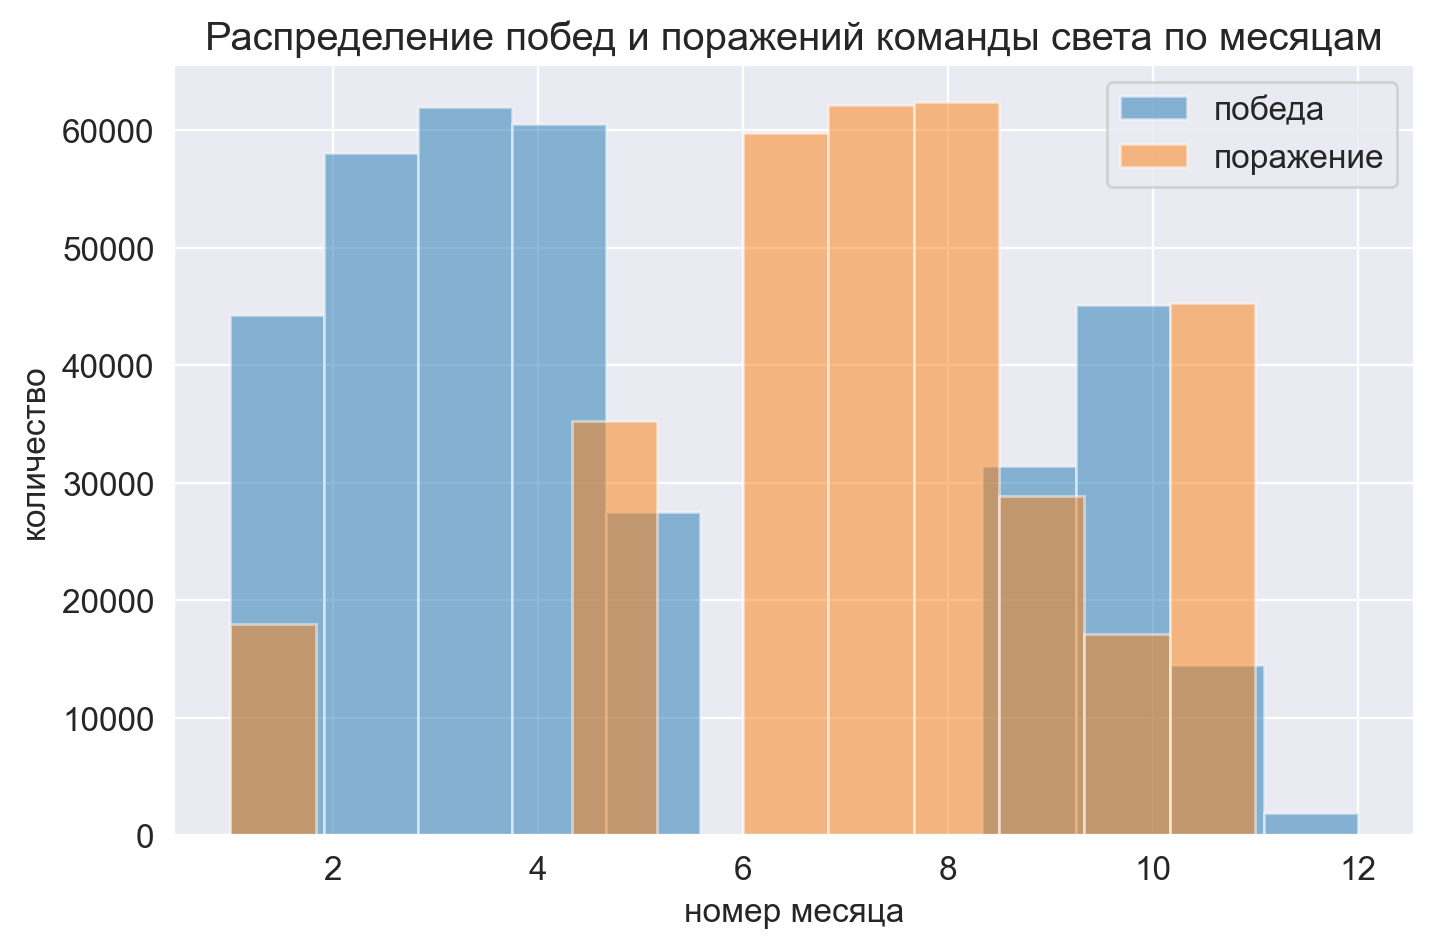

In [56]:
plt.hist(data_matches_cleaned[data_matches_cleaned['radiant_win']==1]['month'], alpha=0.5, bins=12, label='победа')
plt.hist(data_matches_cleaned[data_matches_cleaned['radiant_win']==0]['month'], alpha=0.5, bins=12, label='поражение')
plt.title('Распределение побед и поражений команды света по месяцам')
plt.ylabel('количество')
plt.xlabel('номер месяца')
plt.legend()
plt.savefig('figure115.pdf', format='pdf')
plt.show()

Из графика видно, что предположение по летним месяцам неверное, в них команда света проигрывает, возможно, игроки устают к середине года. Но февраль, март и апрель являются месяцами, в которые побеждала только команда света, пометим их как знаменательные.

In [57]:
data_matches_cleaned['month_flag_win'] = np.where(data_matches_cleaned['month'].isin([2, 3, 4]), 1, 0)
data_test_cleaned['month_flag_win'] = np.where(data_test_cleaned['month'].isin([2, 3, 4]), 1, 0)

#### Задание 3.5. Бинаризация (0.5 балла)

В нашем мире бывает так, что один отдельный признак оказывается настолько важен, или настолько сложен, что одним весом в линейной регрессии его ну никак не описать. Тогда на помощь часто приходит бинаризация. Ее суть заключается в том, что все распределение признака бьется на непересекающиеся бины и каждый из них уже можно закодировать, например, отдельной категорией бина. Попробуем?

Сделайте следующее:

1. Возьмите признак, который, как вам кажется, может быть хорошей целью для бинаризации. Это может быть что угодно до тех пор, пока признак вещественный.

Бинаризировать будем duration это пока единственный вещественный признак

3. Бинаризуйте признак произвольным способом (равномерная сетка, квантильная сетка, ...).

Пусть будет квантильная сетка, так как время игры скорее всего растет не пропорционально.

4. Проверьте, зашло там или нет.

In [58]:
#Делим данные на 4 квантиля
data_matches_cleaned['duration_quantile'] = pd.qcut(data_matches_cleaned['duration'], q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [59]:
#Сравнивать метрики моделей будем с признаками 'dayofweek', 'month', 'game_mode', 'duration_quantile', так как date слишком скореллирован
categorical_2 = ['dayofweek', 'month', 'game_mode', 'duration_quantile', 'region']
X_2 = data_matches_cleaned[categorical_2]
y_2 = data_matches_cleaned['radiant_win']
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)

column_transformer_2 = ColumnTransformer([
    ('ohe', ce.BaseNEncoder(handle_unknown='ignore'), categorical_2),
])

X_train_2 = column_transformer_2.fit_transform(X_train_2)
X_val_2 = column_transformer_2.transform(X_val_2)

In [60]:
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train_2, y_train_2)
train_predict_2 = model_3.predict(X_train_2)
val_predict_2 = model_3.predict(X_val_2)

print('Метрика Джини для тренировочной выборки при квантильной сетке с BaseNEncoder: ', gini(y_train_2, train_predict_2))
print('Метрика Джини для валидационной выборки при квантильной сетке с BaseNEncoder: ', gini(y_val_2, val_predict_2))

Метрика Джини для тренировочной выборки при квантильной сетке с BaseNEncoder:  0.4407523645825311
Метрика Джини для валидационной выборки при квантильной сетке с BaseNEncoder:  0.43742678799806134


In [61]:
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

print('Метрика Джини для тренировочной выборки без бинаризации с BaseNEncoder: ', gini(y_train, train_predict))
print('Метрика Джини для валидационной выборки без бинаризации с BaseNEncoder: ', gini(y_val, val_predict))

Метрика Джини для тренировочной выборки без бинаризации с BaseNEncoder:  0.19088874107684006
Метрика Джини для валидационной выборки без бинаризации с BaseNEncoder:  0.18942470795616195


Стоит также проверить кодировку OneHotEncoding, может метрика Джини там выше

In [62]:
#Сравнивать метрики моделей будем с признаками 'dayofweek', 'month', 'game_mode', 'duration_quantile', так как date слишком скореллирован
categorical_2 = ['dayofweek', 'month', 'game_mode', 'duration_quantile', 'region']
X_2 = data_matches_cleaned[categorical_2]
y_2 = data_matches_cleaned['radiant_win']
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)

column_transformer_2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_2),
])

X_train_2 = column_transformer_2.fit_transform(X_train_2)
X_val_2 = column_transformer_2.transform(X_val_2)

In [63]:
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train_2, y_train_2)
train_predict_2 = model_3.predict(X_train_2)
val_predict_2 = model_3.predict(X_val_2)

print('Метрика Джини для тренировочной выборки при квантильной сетке с OneHotEncoder: ', gini(y_train_2, train_predict_2))
print('Метрика Джини для валидационной выборки при квантильной сетке с OneHotEncoder: ', gini(y_val_2, val_predict_2))

Метрика Джини для тренировочной выборки при квантильной сетке с OneHotEncoder:  0.6879290392336705
Метрика Джини для валидационной выборки при квантильной сетке с OneHotEncoder:  0.6832103163930607


In [64]:
numeric = ['duration']
categorical = ['dayofweek', 'month', 'game_mode', 'region']
column_transformer_4 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

X = data_matches_cleaned[numeric + categorical]
y = data_matches_cleaned['radiant_win']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = column_transformer_4.fit_transform(X_train)
X_val = column_transformer_4.transform(X_val)

In [65]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

print('Метрика Джини для тренировочной выборки без бинаризации с OneHotEncoder: ', gini(y_train, train_predict))
print('Метрика Джини для валидационной выборки без бинаризации с OneHotEncoder: ', gini(y_val, val_predict))

Метрика Джини для тренировочной выборки без бинаризации с OneHotEncoder:  0.6873399825027224
Метрика Джини для валидационной выборки без бинаризации с OneHotEncoder:  0.683035993409715


Выводы: Лучше использовать OneHotEncoder и квантильную бинаризацию можно не делать, качество на трейне незначительно поднялось, а на валидации незначительно упало

### **Задание 4. Эмбеддинги** (2 балла) <img align="center" src="https://static.wikia.nocookie.net/dota2_gamepedia/images/1/17/Emoticon_sick.gif/revision/latest?cb=20180504011850">

Пока что мы никак не использовали информацию про героев, а ведь от них напрямую зависит исход матча, их больше 100 штук и все они разные: кто-то сильнее, кто-то слабее. Делать мы это будем при помощи эмбеддингов. Это не самая универсальная техника, но зачастую она оказывается крайне полезной, ведь в векторном пространстве определено много веселых операций, например, поиск соседей, расстояние между векторами и прочее. Здесь мы познакомимся с самым простым способом их получения через прямое кодирование нужных категорий.

#### Задание 4.1. Эмбеддер героев (1 балл)

Посмотрите на табличку `player_df.csv`, в ней содержатся все герои, участвовавшие в матче. Ваша задача - закодировать каждый матч вектором, вида:

| match_id | match_embedding
| --- | --- |
| 228 | 1 0 0 -1 -1 0 0 |

Здесь `match_embedding` - закодированный вектор матча, каждый элемент которого принимает значение 1, если герой был в команде сил света, и -1, если в команде сил тьмы, подобно `OneHotEncoder`, но не совсем. Решение вставлять его одной колонкой или разбивать вектор на n колонок оставляем за вами.

Что хочется видеть:
1. Трансформер оформлен в виде отдельной функции или класса.
2. Трансформер принимает на вход аргумент `n_heroes`, который отвечает за то, подсчитываем мы наличие одного героя или может быть сразу нескольких, кажется ничего не мешает сразу масштабировать наше преобразование.
3. Трансформер корректно работает и корректно определяет, какой игрок из какой команды (обратите внимание на слотов игроков в матче и сообразите, как они соотносятся с командами).
4. Трансформер корректно применяется к трейну и валидации.

Детали реализации трансформера оставляем вам - можете воспользоваться [TransformerMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) и подогнать его под склерновский шаблон, можете воспользоваться готовыми трансформерами, а можете писать с нуля.

In [66]:
#Код запускается, но очень долго обрабатывается и не может пройти все данные
class HeroesEmbedder:

    def __init__(self, n_heroes: int = 1):
        self.n_heroes = n_heroes

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        results = []
        for match in X['match_id'].unique():
            match_vector = np.zeros(self.n_heroes, dtype=int)
            match_data = X[X['match_id'] == match]
            for i in range(self.n_heroes):
                hero_data = match_data[match_data['hero_id'] == i]
                if not hero_data.empty:
                    player_slot = hero_data['player_slot'].iloc[0]
                    if player_slot in (0, 1, 2, 3, 4):
                        match_vector[i] = 1
                    elif player_slot in (128, 129, 130, 131, 132):
                        match_vector[i] = -1
            results.append({
                'match_id': match,
                'match_embedding': match_vector
            })
        
        return pd.DataFrame(results)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

Как проверить корректность эмбеддера:

1) Для каждого матча горизонтальная сумма должна быть 0, то есть ровно 5 героев сил Света и 5 героев сил Тьмы. Если у вас получилось не так - не спешите ставить крест на карьере дата сайентиста, а посмотрите на эти матчи подробнее, выведите их, проанализируйте и решите, что с этим делать.
2) Для каждого матча значений '1' и '-1' должно быть ровно 5, все игроки должны иметь уникальный `id`. Опять же, если это не так - покажите, где это происходит и решите, что с этим делать.

In [67]:
#player_df = data_players.copy(deep=True)

In [68]:
#embedder = HeroesEmbedder(n_heroes=1)
#embeds = embedder.fit_transform(player_df)

Если вы уверены в своей правоте - присоедините эти данные к обучающей и валидационной выборке, и обучите модель.

In [69]:
# ヾ(⌐■_■)ノ♪ your code here

#### Задание 4.2. Эмбеддер винрейта (1 балл)

Помимо данных о присутствии героев, явно не помешает статистика, как часто эти герои выигрывают. Логично предположить, что если герой, например всеми любимый Pudge, побеждает в 99% игр, шансы на победу в будущих матчах тоже крайне высоки.

**Вопрос:** Как вы считаете, полезен ли будет этот признак, если мы уже сделали эмбеддинг героев из предыдущего пункта?

**Ответ:**

Еще одна народная мудрость, которая часто встречается в мире машинного обучения: чем лучше получается декомпозировать тот или иной признак, тем лучше. Фактически шанс на победу определенного героя, или пары-тройки-четверки героев, определяется не только тем, как часто они побеждают, но их как часто их берут, подумайте почему (необязательно вслух).

Давайте сделаем такой трансформер:

| match_id | wincount_embedding | pickcount_embedding |
| --- | --- | --- |
| 228 | 1 0 0 0 1 0 0 | 1 0 0 0 1 0 0 |
| 322 | 0.5 0 0 0 1 0 0 | 2 0 0 0 2 0 0 |
| 1337| 0.33 0 0 1 0.5 0 0 | 3 0 0 1 3 0 0 |
| ... | ... | ... |

1. Трансформер оформлен в виде класса или функции.
2. Трансформер подсчитывает **кумулятивное** число побед (`wincount_HERO`) и кумулятивное число матчей (`pickcount_HERO`) для каждого героя на тренировочной выборке и средний винрейт, средний пикрейт по герою на валидационной выборке (средние будем собирать в методе `fit`).
3. Если героя в матче нет, его винрейт не интересен, поэтому элементы эмбеддинга там будут 0.
4. Трансформер все еще может работать для связок героев, поэтому параметр `n_heroes` оставялем нетронутым.

In [70]:
class WinrateEmbedder:

    def __init__(self, n_heroes: int = 1):
        self.n_heroes = n_heroes

    def fit(self, X, y=None):
        # ヾ(⌐■_■)ノ♪ your code here
        raise Exception("fit method not implemented")

    def transform(self, X, y=None):
        # ヾ(⌐■_■)ノ♪ your code here
        raise Exception("transform method not implemented")

Как проверить корректность эмбеддера:

1) `pickcount` и `wincount` для каждого героя должны быть неубывающими, если ваш датафрейм отсортирован по дате.
2) Для каждого матча ненулевых значений в обоих эмбеддингах должно быть не более 10.

In [71]:
#wr_embedder = WinrateEmbedder(n_heroes=1)
#wr_embeds = wr_embedder.fit_transform(player_df)

Если вы считаете, что у вас все отлично, то вам также предлагается подумать - хотим ли мы делать вектор `winrate_embedding` вместо двух отдельных? Каково бы ни было ваше решение, обучите модель и замерьте качество.

In [72]:
# ヾ(⌐■_■)ノ♪ your code here

### **Задание 5. Агрегации** (2 балла) <img align="center" src="https://static.wikia.nocookie.net/dota2_gamepedia/images/4/4a/Techies_emoticon.gif/revision/latest?cb=20180504014918">

Одна из самых эффективных и в то же время громоздких трансформаций, которые можно сделать с данными - это разного рода агрегации. В первом дз мы немножко баловались с `group_by`, теперь сделаем то же самое, но уже на стероидах. Идея здесь максимально проста - схлопнуть массив данных до одного или нескольких чисел, которые эти данные описывают. Как правило, это довольно эффективная техника, но крайне громоздкая, например, для $n$ признаков, $m$ агрегаций и $d$ размера окна агрегаций, признаков получится чуть ли не $n \cdot m \cdot d$, что немало.

#### Задание 5.1. Статистики матча (0.5 балла)

Из данных, что мы все еще не использовали, есть статистики матча. На протяжении игры каждая команда зарабатывает золото и опыт. Как правило, считается, что чем циферки больше, тем больше у команды шансов на выигрыш. Разумеется, это не гарантия, но это мы сейчас и проверим. Ниже вы можете увидеть пример графика преимущества, на который мы и будем смотреть.

<img src="https://media.discordapp.net/attachments/674191702906503199/1429333425436885003/52733B32-B6C2-49FF-AABB-C3A4B3035F16.png?ex=68f5c1fc&is=68f4707c&hm=a01032723e1f1653b34f47e340ac7751d07f485b4592d0f968fc046f148a9b53&=&format=webp&quality=lossless&width=771&height=544">

Положительное значение - преимущество в пользу команды Radiant, негативное - в пользу команды Dire. Каждое значение колонки `..._adv` содержит в себе массив значений, каждый из которых представляет из себя график, или распределение, у которого есть какие-то параметры, надо бы их достать.

Сделаем вот что:
1. Посмотрите на колонки с суффиксом `_adv`.
2. Проверьте их на наличие нанов и всяких смешных краевых случаев. В первую очередь нас интересует, чтобы они не были пустыми и чтобы в них было ровно 16 значений.
3. Посчитайте простые статистики распределения, хотя бы штуки 4. Часть из них вы можете знать из курса статистики, часть вы можете найти в вашей любимой библиотеке для обработки данных, например [тут](https://docs.pola.rs/api/python/stable/reference/expressions/computation.html) или [тут](https://docs.pola.rs/api/python/stable/reference/expressions/aggregation.html), какие-то признаки вы можете достать, если вспомните матан и подумаете, как фанфакты про график могут помочь модели. Для референса можете поиграть в "что хотел сказать автор" на графике выше, там есть несколько подсказок.
4. Проанализируйте, насколько это может оказаться полезным, - постройте heatmap корреляции посчитанных вами признаков с целевой переменной и между собой и сделайте вывод.

#### Задание 5.2. Тренд (0.75 балла)

Каждый уважающий себя лудоман знает, что 99% процентов игроков останавливается ровно перед тем, как сорвать джекпот. Так и здесь - если команда с треском проигрывает в первые 15 минут матча, возможно это признак камбека в следующие 50, как знать? Попробуем собрать агрегацию похитрее - она будет обозначать тренд, который есть в графиках преимущества, и если пословица верна, наша модель уловит эту зависимость.

<span style="color:grey"><font size="1">Администрация курса МО-1 категорически осуждает азартные игры, пример приводится сугубо в образовательных целях.</font></span>

Алгоритм действий:
1. Создать трансформер, который принимает на вход функцию агрегации.
2. Выделить тренд для обоих массивов `_adv` при помощи разных функций агрегаций. Попробуйте хотя бы два разных метода: разность первого и последнего значений, линейная регрессия, обученная методом МНК, нелинейная регрессия, что-то еще...
3. Добавьте хотя бы два соответствующих признака вашим трансформером (либо два разных метода, либо тренд для Radiant и тренд для Dire).
4. Проверьте, есть ли корреляция между признаком и таргетом.

In [73]:
class TrendExtractor:

    def __init__(self, agg_func: Callable = None):
        self.agg_func = agg_func

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        # ヾ(⌐■_■)ノ♪ your code here
        raise Exception("transform method not implemented")

#### Задание 5.3. Площадь под кривой и взаимодействие признаков (0.75 балла)

Скорее всего, признаки, что вы считали в предыдущих пунктах задействовали либо информацию по оси x, либо информацию по оси y, но никак не обе сразу. Один из способов попробовать учесть и то, и другое - комбинация признаков, например, можно взять и перемножить признаки между собой, либо взять и собрать кортеж из нескольких категориальных признаков. Кажется, что в пунктах с эмбеддингами и простейшим EDA это сделать совершенно не сложно, ведь признаки уже декомпозировано, а что насчет агрегаций?

Площадь под кривой, в зависимости от того, как ее считать, обладает кучей разных прикольных свойств, например, если считать ее по методу левых прямоугольников, графики, которые растут в начале, будут иметь больший скор, чем те, что растут в конце, и так далее.

Попробуем собрать трансформер поинтереснее:

1. Создать трансформер, который принимает на вход функцию интегрирования.
2. Выделить площадь для обоих массивов `_adv` при помощи двух разных функций интегрирования. Попробуйте хотя бы два разных метода: прямоугольников, трапеций, Симпсона, и т.д.
3. Добавьте хотя бы два признака (либо два метода, либо площадь для Radiant и Dire).
4. Проанализируйте самостоятельно, что важнее - преимущество в начале или в конце матча (таким образом у нас одновременно и зависимость по x, т.е. времени, и по y). Создайте кастомную функцию интегрирования (не метод прямоугольников), которая будет давать больший вест правому или левому хвосту. Добавьте этот признак.
5. Посмотрите, дает ли этот признак вклад в качество модели.

In [74]:
class AUCExtractor:

    def __init__(self, agg_func: Callable = None):
        self.agg_func = agg_func

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        # ヾ(⌐■_■)ノ♪ your code here
        raise Exception("transform method not implemented")

### **Задание 6. High tech. Low life (1 балл)** <img height=25px align="center" src="https://media1.tenor.com/m/72ScVNgTGpYAAAAC/kaneki-tokyo-ghoul.gif"></img>

Иногда, вместо того, чтобы думать, тратить свои когнитивные ресурсы, что-то анализировать и решать, хочется скинуть свою работу на кого-то другого, что, в целом, вполне разумно. Также и мы можем пойти по пути наименьшего сопротивления и попросить придумать фичи за нас, звучит крайне соблазнительно, а вот полезно ли - совсем другой вопрос.

#### Задание 6.1. Автогенерация признаков (0.5 балла)

В сети Интернет находится множество инструментов для автоматической генерации признаков. Как правило, они не приносят такого же значимого эффекта, как ручная генерация, посколько знания домена и области в библиотеки не запихнешь, но попробовать всегда можно.

Задача:
1. Изучить туториалы из библиотеки [`featuretools`](https://featuretools.alteryx.com/en/stable).
2. Собрать 2-3 признака при помощи DFS или любого другого генератора.
3. Замерить качество и задуматься, зачем нужна эта домашка.

In [75]:
import featuretools as ft

In [76]:
#Оставляем только первую запись для каждого match_id, так как есть дубликаты матчей, а для соединения это должен быть уникальный ключ
data_matches_cleaned = data_matches_cleaned.drop_duplicates(subset=['match_id'])

In [77]:
#Создаем EntitySet
es = ft.EntitySet(id="dota_matches")
#Добавляем data_matches_cleaned
es = es.add_dataframe(
    dataframe_name="matches",
    dataframe=data_matches_cleaned,
    index="match_id"
)
#Для data_players создаем уникальный ключ
data_players = data_players.reset_index(drop=True)
data_players['player_match_id'] = data_players.index
#Добавляем data_players
es = es.add_dataframe(
    dataframe_name="players", 
    dataframe=data_players,
    index='player_match_id',
)
#Добавляем data_heroes_cleaned
es = es.add_dataframe(
    dataframe_name="heroes", 
    dataframe=data_heroes_cleaned,
    index="hero_id",
)
#Создаем отношение между таблицами
es = es.add_relationship(
    parent_dataframe_name="matches",
    parent_column_name="match_id", 
    child_dataframe_name="players",
    child_column_name="match_id"
)
es = es.add_relationship(
    parent_dataframe_name="heroes",
    parent_column_name="hero_id", 
    child_dataframe_name="players",
    child_column_name="hero_id"
)

C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will 

In [78]:
#Собираем признаки с помощью генератора (параметры выставлены для ускорения процесса обработки)
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="matches",
    max_depth=2,
    agg_primitives=["sum", "mean", "count"],
    trans_primitives=[],
    features_only=False,
    verbose=True                   
)

Built 86 features
Elapsed: 00:17 | Progress:  47%|█████████████████████████████████████████                                              

C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:781: FutureWarning: The provided callable <function mean at 0x000002B3F3E3E5E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  to_merge = base_frame.groupby(
C:\Users\elytk\.conda\envs\data_ml\lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:781: FutureWarning: The provided callable <function sum at 0x000002B3F3E39670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  to_merge = base_frame.groupby(


Elapsed: 00:57 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [79]:
feature_defs

[<Feature: region>,
 <Feature: game_mode>,
 <Feature: duration>,
 <Feature: radiant_win>,
 <Feature: dayofweek>,
 <Feature: month>,
 <Feature: log_duration>,
 <Feature: sqrt_duration>,
 <Feature: 1/duration>,
 <Feature: month_flag_win>,
 <Feature: duration_quantile>,
 <Feature: COUNT(players)>,
 <Feature: MEAN(players.account_id)>,
 <Feature: MEAN(players.assists)>,
 <Feature: MEAN(players.deaths)>,
 <Feature: MEAN(players.denies)>,
 <Feature: MEAN(players.gold)>,
 <Feature: MEAN(players.gold_per_min)>,
 <Feature: MEAN(players.hero_damage)>,
 <Feature: MEAN(players.kills)>,
 <Feature: MEAN(players.last_hits)>,
 <Feature: MEAN(players.player_slot)>,
 <Feature: MEAN(players.tower_damage)>,
 <Feature: MEAN(players.xp_per_min)>,
 <Feature: SUM(players.account_id)>,
 <Feature: SUM(players.assists)>,
 <Feature: SUM(players.deaths)>,
 <Feature: SUM(players.denies)>,
 <Feature: SUM(players.gold)>,
 <Feature: SUM(players.gold_per_min)>,
 <Feature: SUM(players.hero_damage)>,
 <Feature: SUM(playe

In [80]:
#Выбираем несколько важных фич
selected_features = feature_matrix[['SUM(players.kills)', 'COUNT(players)', 'SUM(players.deaths)']]
#Добавляем к исходным данным
data_matches_cleaned_features = data_matches_cleaned.merge(selected_features, left_on='match_id', right_index=True, how='left')

In [81]:
numeric = ['duration', 'SUM(players.kills)', 'COUNT(players)', 'SUM(players.deaths)']
categorical = ['dayofweek', 'month', 'game_mode', 'region']
column_transformer_5 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

X = data_matches_cleaned_features[numeric + categorical]
y = data_matches_cleaned_features['radiant_win']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = column_transformer_5.fit_transform(X_train)
X_val = column_transformer_5.transform(X_val)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

print('Метрика Джини для тренировочной выборки: ', gini(y_train, train_predict))
print('Метрика Джини для валидационной выборки: ', gini(y_val, val_predict))

Метрика Джини для тренировочной выборки:  0.6875455219143236
Метрика Джини для валидационной выборки:  0.6823650655006817


DFS создает не сильно значащие признаки, как видно по метрикам Джини (без сгенерированных признаков показатели примерно такие же). Части признаков при создании не имеет смысла, как усредненный айди например. Без контекста сложно создать значащие признаки, оперируя только базовыми агрегатными функциями.

#### Задание 6.2. Нейросетевые признаки (0.5 балла)

Если вы следите за новостями, то вы, наверное, заметили, что в последнее время появилась такая модная и хайповая вещь, как большие языковые модели. Злые языки утверждают, что обычному работяге фит предиктору не место в мире будущего, где господствует ИИ. Давайте в этом (раз)убедимся.

Попробуйте:
1. Спросить у вашей любимой нейросети, какие признаки она может для вас придумать. Можете опираться на пункты выше, можете придумать что-то свое. Но помните, что как говорится, какой стол, такой и стул, поэтому пишите промпты с умом.

Спрашивала у DeepSeek

2. Показать, что нейросеть вам посоветовала, и реализовать это

Нейросеть предложила вытянуть данные из столбца 'data' (что было сделано в EDA), найти среднее количество побед героя, сделать флаги на предмет редкой категории признака, а также сгруппировать людей на команды и считать их синергию (последнее как в задании про эмбеддинги).

3. Проанализировать результат и сделать твердый и четкий вывод, заменят ли нас LLM-ки.

LLM-ки предлагают стандартные преобразования признаков, что хорошо, в случае, если человек не знает, что делать. Общий кругозор и знания в определенных сферах, могут помочь человеку найти нестандартные подходы при моздании определенных признаков, а базовую обработку можно будет в скором времени доверить LMM (пока он может ошибиться). Качество метрики Джини увеличилось на 0.5%

In [82]:
#Делаем флаги,какой режим можно считать редким
mode_counts = data_matches_cleaned['game_mode'].value_counts()
data_matches_cleaned['is_rare_mode'] = data_matches_cleaned['game_mode'].isin(mode_counts[mode_counts < len(data_matches_cleaned) * 0.05].index).astype(int)
#Делаем флаги,какой регион можно считать редким
region_counts = data_matches_cleaned['region'].value_counts()
data_matches_cleaned['is_rare_region'] = data_matches_cleaned['region'].isin(region_counts[region_counts < len(data_matches_cleaned) * 0.03].index).astype(int)

In [83]:
#Объединим таблицы, чтобы сделать столбец win_rate
data_matches_players = pd.merge(data_matches_cleaned, data_players, on='match_id', how='left')

In [84]:
#Какое среднее количество побед с определенным героем
player_hero_win_rate = {}
player_hero_win_rate = data_matches_players.groupby(['hero_id'])['radiant_win'].sum().to_dict()
data_players['win_rate'] = data_players['hero_id'].map(player_hero_win_rate).fillna(0)
# Добавляем столбец с 'win_rate'
#data_players['win_rate'] = data_players.apply(
#    lambda row: player_hero_win_rate.get(
#        (row['hero_id']), 
#        0
#    ), 
#    axis=1
#)

In [85]:
data_test_players = pd.merge(data_test_cleaned, data_players, on='match_id', how='left')

In [86]:
data_matches_players = pd.merge(data_matches_cleaned, data_players, on='match_id', how='left')

In [87]:
numeric_6 = ['duration', 'is_rare_mode', 'is_rare_region', 'win_rate']
categorical_6 = ['dayofweek', 'month', 'game_mode', 'region']
column_transformer_6 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_6),
    ('scaling', StandardScaler(), numeric_6)
])

X_6 = data_matches_players[numeric_6 + categorical_6]
y_6 = data_matches_players['radiant_win']
X_train_6, X_val_6, y_train_6, y_val_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=42, stratify=y_6)
X_train_6 = column_transformer_6.fit_transform(X_train_6)
X_val_6 = column_transformer_6.transform(X_val_6)

model_6 = LogisticRegression(random_state=42)
model_6.fit(X_train_6, y_train_6)
train_predict_6 = model_6.predict(X_train_6)
val_predict_6 = model_6.predict(X_val_6)

print('Метрика Джини для тренировочной выборки: ', gini(y_train_6, train_predict_6))
print('Метрика Джини для валидационной выборки: ', gini(y_val_6, val_predict_6))

Метрика Джини для тренировочной выборки:  0.6861134602226386
Метрика Джини для валидационной выборки:  0.6866476632501757


(array([  60393.,  514588., 1217890., 1566671.,  881693.,  864921.,
         825400.,  944896.,  437305.,  337068.]),
 array([  840.,  8792., 16744., 24696., 32648., 40600., 48552., 56504.,
        64456., 72408., 80360.]),
 <BarContainer object of 10 artists>)

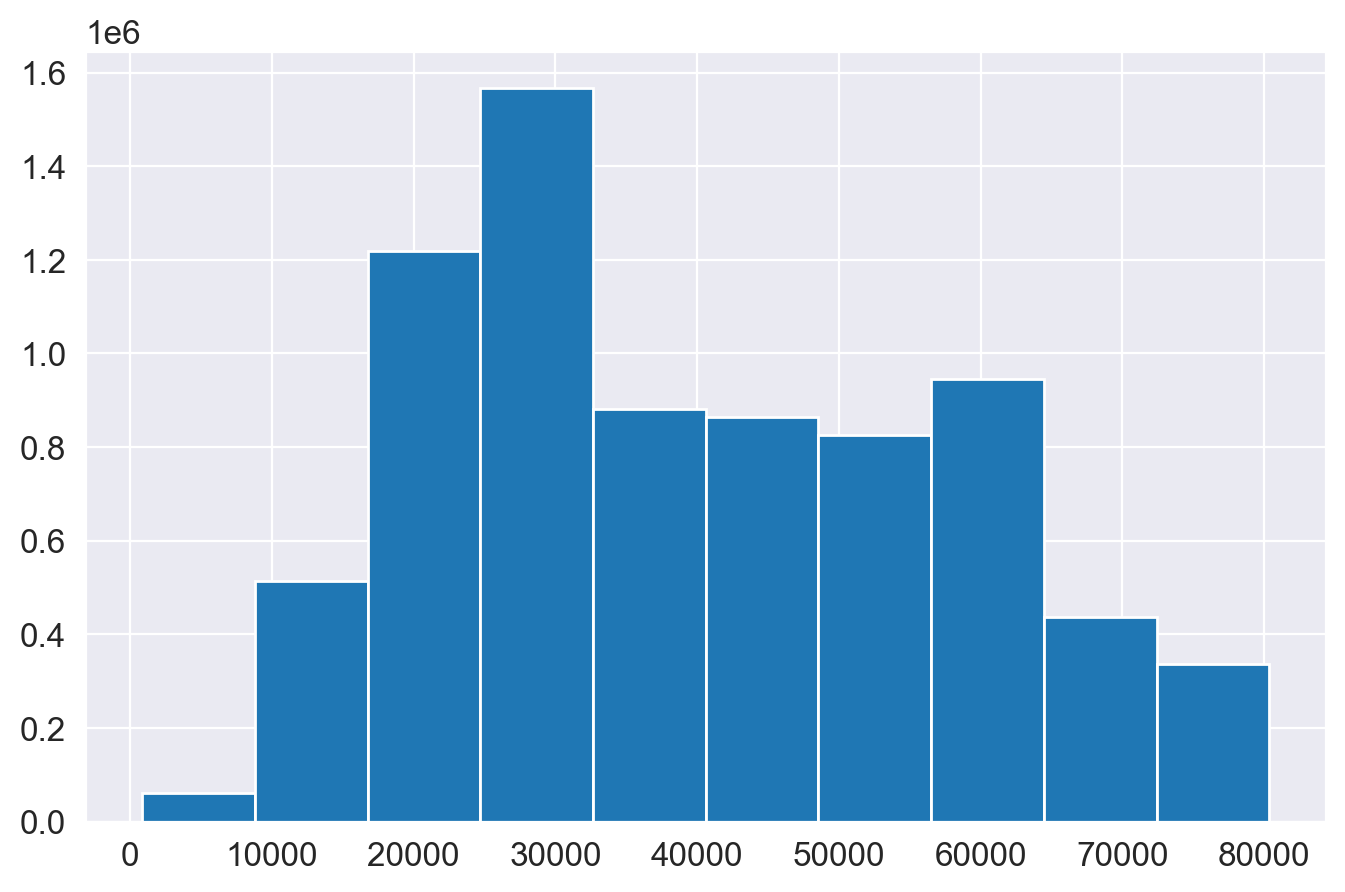

In [88]:
plt.hist(data_players['win_rate'])

### Заключение

Чтобы победить в соревновании, вам может понадобиться куда большее количество признаков. Не стесняйтесь гуглить, масштабировать пункты выше, например, эмбеддинги, пробовать применять те же техники, но к другим признакам, пробовать разные схемы валидации, тюнить в конце концов. Единого рецепта для лучшего решения задачи, увы, не существует, это горькая правда всего машинного обучения

Здесь хочу написать итоговую модель, пройдя по всем пунктам, где качество становилос лучше. Флаги 'is_rare_mode', 'is_rare_region' дают много NaN, так что их использовать не будем. Duration в основном в тестовой выборке заполнен медианным значением, поэтому опираться на этот признак будет не очень хорошей идеей, все остальные признаки оставим

In [89]:
numeric = ['month_flag_win', 'win_rate']
categorical = ['dayofweek', 'month', 'game_mode', 'region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

X = data_matches_players[numeric + categorical]
y = data_matches_players['radiant_win']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, X_val), n_trials=100)
print(study.best_params)

[I 2025-11-06 23:55:22,696] A new study created in memory with name: no-name-c1ff2c1c-877c-4684-954e-3ccf6c403aad
[I 2025-11-06 23:55:34,907] Trial 0 finished with value: 0.6856003167197071 and parameters: {'C': 8.871095912787263, 'max_iter': 526}. Best is trial 0 with value: 0.6856003167197071.
[I 2025-11-06 23:55:47,000] Trial 1 finished with value: 0.6856045876848413 and parameters: {'C': 8.407352884299334, 'max_iter': 350}. Best is trial 1 with value: 0.6856045876848413.
[I 2025-11-06 23:55:59,318] Trial 2 finished with value: 0.685606469772243 and parameters: {'C': 6.390966194425653, 'max_iter': 370}. Best is trial 2 with value: 0.685606469772243.
[I 2025-11-06 23:56:16,844] Trial 3 finished with value: 0.6855673789312668 and parameters: {'C': 1.1111424241211199, 'max_iter': 505}. Best is trial 2 with value: 0.685606469772243.
[I 2025-11-06 23:56:29,167] Trial 4 finished with value: 0.6855859111100311 and parameters: {'C': 3.9354385416555404, 'max_iter': 256}. Best is trial 2 with

{'C': 9.428586182903201, 'max_iter': 694}


In [90]:
#Обучаем модель с L1-регуляризацией для определения важности фичей
model_l1 = LogisticRegression(penalty='l1', random_state=42, solver='liblinear', C=9.511372729711535, max_iter=639)
model_l1.fit(X_train, y_train)
#Получаем важность признаков
feature_importance = np.abs(model_l1.coef_[0])
#Сортируем фичи по важности
sorted_indices = np.argsort(feature_importance)[::-1]
mas_percentage = [0.25, 0.5, 0.75, 1]
gini_best = 0
best_percent = 0
#Смотрим модель с каким процентом важных признаков будет работать лучше (делаем цикл по количеству признаков)
for percent in mas_percentage:
    #Смотрим индексы лучших признаков * процент, который берем
    top_indices = sorted_indices[:round(X_train.shape[1] * percent)]
    X_train_p = X_train[:, top_indices]
    X_val_p = X_val[:, top_indices]
    #Обучаем модель
    model_4 = LogisticRegression(random_state=42, C=9.511372729711535, max_iter=639)
    model_4.fit(X_train_p, y_train)
    val_predict = model_4.predict(X_val_p)
    gini_valid = gini(y_val, val_predict)
    #Если метрика Джини увеличилась, меняем лучший процент
    if gini_valid > gini_best:
        gini_best = gini_valid
        best_percent = percent

In [91]:
print(best_percent)
print(gini_valid)

1
0.6856124057465134


In [92]:
numeric = ['month_flag_win', 'win_rate']
categorical = ['dayofweek', 'month', 'game_mode', 'region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

X = data_matches_players[categorical + numeric]
y = data_matches_players['radiant_win']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)

model = LogisticRegression(random_state=42, C=9.511372729711535, max_iter=639)
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

print('Метрика Джини для тренировочной выборки: ', gini(y_train, train_predict))
print('Метрика Джини для валидационной выборки: ', gini(y_val, val_predict))

Метрика Джини для тренировочной выборки:  0.6854736592812913
Метрика Джини для валидационной выборки:  0.6856124057465134


In [93]:
X_test = data_test_players[numeric + categorical]
X_test = column_transformer.transform(X_test)
test_predict_proba = model.predict_proba(X_test)
positive_proba = test_predict_proba[:, 1]

In [94]:
results = pd.DataFrame({
    'ID': data_test_players['match_id'],
    'proba': positive_proba
})

In [95]:
results.duplicated().sum()

np.int64(241)

In [96]:
results.isna().sum()

ID       0
proba    0
dtype: int64

In [98]:
clean_result = results.drop_duplicates()

In [101]:
clean_result['ID'].duplicated().sum()

np.int64(546310)

In [99]:
clean_result.to_csv('predictions.csv', index=False)

### А теперь об оценивании

Каждая из задач в ноутбуке имеет свою стоимость (указана в скобках рядом с задачей). При этом важно уточнить разницу между баллами за ноутбук и дополнительными баллами за позицию на приватном лидерборде в соревновании на Kaggle:

1. **Максимум за код/ноутбук — 8.0 баллов.**
   То есть, независимо от суммарной теоретической суммы всех подпунктов в тексте задания, за реализацию в ноутбуке можно получить не более 8 баллов.

2. **Максимально возможная оценка за всю работу — 11.0 баллов.**
   Остальные до 3.0 баллов начисляются за результаты в соревновании на Kaggle (лидерборд), при выполненном и загруженном в систему Anytask ноутбуке.

Баллы за сореву состоят из двух частей: процентильный бонус (до 2.0 баллов) и бонус за попадание в топ-10 (до 1.0 балла). Суммарный вклад соревнования не может превышать 3.0 баллов.

**A. Процентильный балл (не суммируется):**

* Если вы обогнали ≥ 90% участников (т.е. попали в топ 10%) — +2.0 балла.
* Если вы обогнали ≥ 60% участников — +1.5 балла.
* Если вы обогнали ≥ 30% участников — +1.0 балла.
* Если вы обогнали ≥ 10% участников — +0.5 балла.

**B. Балл за попадание в топ-10 (дополнительно):**

* 1-е место — +1.00 балла
* 2-е–3-е место — +0.75 балла
* 4-е–7-е место — +0.50 балла
* 8-е–10-е место — +0.25 балла

Пример расчёта

* Вы сделали ноутбук и получили за него 7.0 / 8.0.
* На лидерборде вы, зайка, обогнали 10% участников → процентильный бонус +2.0.
* Ваша позиция — 3-е место → топ-10 бонус +0.75.
* Итого: 7.0 + 2.0 + 0.75 = 9.75.

**Требование к воспроизводимости**

Баллы за соревнование начисляются **только** при наличии готового, полностью воспроизводимого пайплайна, который подтверждает результат лучшего сабмита. Такое решение нужно сдавать вместе с ноутбуком и своим ников в kaggle в Anytask ассистенту. Пайплайн должен выполнять всё автоматически при запуске ноутбука: при последовательном исполнении всех ячеек ноутбука (без ручных вмешательств) он должен воспроизвести предобработку, обучение/инференс и сгенерировать итоговый CSV-файл с прогнозами, используемый для сабмита. Среда запуска - colab.